Install and import feedback gadget

In [46]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt  # root-finding algorithm

In [47]:
!pip install ipywidgets

Figure Setting

In [48]:
# @title Figure Settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import ipywidgets as widgets  # interactive display
!

%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

Plotting Functions

In [49]:
# @title Plotting Functions

def plot_FI_inverse(x, a, theta):
  f, ax = plt.subplots()
  ax.plot(x, F_inv(x, a=a, theta=theta))
  ax.set(xlabel="$x$", ylabel="$F^{-1}(x)$")


def plot_FI_EI(x, FI_exc, FI_inh):
  plt.figure()
  plt.plot(x, FI_exc, 'b', label='E population')
  plt.plot(x, FI_inh, 'r', label='I population')
  plt.legend(loc='lower right')
  plt.xlabel('x (a.u.)')
  plt.ylabel('F(x)')
  plt.show()


def my_test_plot(t, rE1, rI1, rE2, rI2):

  plt.figure()
  ax1 = plt.subplot(211)
  ax1.plot(pars['range_t'], rE1, 'b', label='E population')
  ax1.plot(pars['range_t'], rI1, 'r', label='I population')
  ax1.set_ylabel('Activity')
  ax1.legend(loc='best')

  ax2 = plt.subplot(212, sharex=ax1, sharey=ax1)
  ax2.plot(pars['range_t'], rE2, 'b', label='E population')
  ax2.plot(pars['range_t'], rI2, 'r', label='I population')
  ax2.set_xlabel('t (ms)')
  ax2.set_ylabel('Activity')
  ax2.legend(loc='best')

  plt.tight_layout()
  plt.show()


def plot_nullclines(Exc_null_rE, Exc_null_rI, Inh_null_rE, Inh_null_rI):

  plt.figure()
  plt.plot(Exc_null_rE, Exc_null_rI, 'b', label='E nullcline')
  plt.plot(Inh_null_rE, Inh_null_rI, 'r', label='I nullcline')
  plt.xlabel(r'$r_E$')
  plt.ylabel(r'$r_I$')
  plt.legend(loc='best')
  plt.show()


def my_plot_nullcline(pars):
  Exc_null_rE = np.linspace(-0.01, 0.96, 100)
  Exc_null_rI = get_E_nullcline(Exc_null_rE, **pars)
  Inh_null_rI = np.linspace(-.01, 0.8, 100)
  Inh_null_rE = get_I_nullcline(Inh_null_rI, **pars)

  plt.plot(Exc_null_rE, Exc_null_rI, 'b', label='E nullcline')
  plt.plot(Inh_null_rE, Inh_null_rI, 'r', label='I nullcline')
  plt.xlabel(r'$r_E$')
  plt.ylabel(r'$r_I$')
  plt.legend(loc='best')


def my_plot_vector(pars, my_n_skip=2, myscale=5):
  EI_grid = np.linspace(0., 1., 20)
  rE, rI = np.meshgrid(EI_grid, EI_grid)
  drEdt, drIdt = EIderivs(rE, rI, **pars)

  n_skip = my_n_skip

  plt.quiver(rE[::n_skip, ::n_skip], rI[::n_skip, ::n_skip],
             drEdt[::n_skip, ::n_skip], drIdt[::n_skip, ::n_skip],
             angles='xy', scale_units='xy', scale=myscale, facecolor='c')

  plt.xlabel(r'$r_E$')
  plt.ylabel(r'$r_I$')


def my_plot_trajectory(pars, mycolor, x_init, mylabel):
  pars = pars.copy()
  pars['rE_init'], pars['rI_init'] = x_init[0], x_init[1]
  rE_tj, rI_tj = simulate_wc(**pars)

  plt.plot(rE_tj, rI_tj, color=mycolor, label=mylabel)
  plt.plot(x_init[0], x_init[1], 'o', color=mycolor, ms=8)
  plt.xlabel(r'$r_E$')
  plt.ylabel(r'$r_I$')


def my_plot_trajectories(pars, dx, n, mylabel):
  """
  Solve for I along the E_grid from dE/dt = 0.

  Expects:
  pars    : Parameter dictionary
  dx      : increment of initial values
  n       : n*n trjectories
  mylabel : label for legend

  Returns:
    figure of trajectory
  """
  pars = pars.copy()
  for ie in range(n):
    for ii in range(n):
      pars['rE_init'], pars['rI_init'] = dx * ie, dx * ii
      rE_tj, rI_tj = simulate_wc(**pars)
      if (ie == n-1) & (ii == n-1):
          plt.plot(rE_tj, rI_tj, 'gray', alpha=0.8, label=mylabel)
      else:
          plt.plot(rE_tj, rI_tj, 'gray', alpha=0.8)

  plt.xlabel(r'$r_E$')
  plt.ylabel(r'$r_I$')


def plot_complete_analysis(pars):
  plt.figure(figsize=(7.7, 6.))

  # plot example trajectories
  my_plot_trajectories(pars, 0.2, 6,
                       'Sample trajectories \nfor different init. conditions')
  my_plot_trajectory(pars, 'orange', [0.6, 0.8],
                     'Sample trajectory for \nlow activity')
  my_plot_trajectory(pars, 'm', [0.6, 0.6],
                     'Sample trajectory for \nhigh activity')

  # plot nullclines
  my_plot_nullcline(pars)

  # plot vector field
  EI_grid = np.linspace(0., 1., 20)
  rE, rI = np.meshgrid(EI_grid, EI_grid)
  drEdt, drIdt = EIderivs(rE, rI, **pars)
  n_skip = 2
  plt.quiver(rE[::n_skip, ::n_skip], rI[::n_skip, ::n_skip],
             drEdt[::n_skip, ::n_skip], drIdt[::n_skip, ::n_skip],
             angles='xy', scale_units='xy', scale=5., facecolor='c')

  plt.legend(loc=[1.02, 0.57], handlelength=1)
  plt.show()


def plot_fp(x_fp, position=(0.02, 0.1), rotation=0):
  plt.plot(x_fp[0], x_fp[1], 'ko', ms=8)
  plt.text(x_fp[0] + position[0], x_fp[1] + position[1],
           f'Fixed Point1=\n({x_fp[0]:.3f}, {x_fp[1]:.3f})',
           horizontalalignment='center', verticalalignment='bottom',
           rotation=rotation)
           

Helper Functions

In [50]:
# @title Helper Functions

def default_pars(**kwargs):
  pars = {}

  # Excitatory parameters
  pars['tau_E'] = 1.     # Timescale of the E population [ms]
  pars['a_E'] = 1.2      # Gain of the E population
  pars['theta_E'] = 2.8  # Threshold of the E population

  # Inhibitory parameters
  pars['tau_I'] = 2.0    # Timescale of the I population [ms]
  pars['a_I'] = 1.0      # Gain of the I population
  pars['theta_I'] = 4.0  # Threshold of the I population

  # Connection strength
  pars['wEE'] = 9.   # E to E
  pars['wEI'] = 4.   # I to E
  pars['wIE'] = 13.  # E to I
  pars['wII'] = 11.  # I to I

  # External input
  pars['I_ext_E'] = 0.
  pars['I_ext_I'] = 0.

  # simulation parameters
  pars['T'] = 50.        # Total duration of simulation [ms]
  pars['dt'] = .1        # Simulation time step [ms]
  pars['rE_init'] = 0.2  # Initial value of E
  pars['rI_init'] = 0.2  # Initial value of I

  # External parameters if any
  for k in kwargs:
      pars[k] = kwargs[k]

  # Vector of discretized time points [ms]
  pars['range_t'] = np.arange(0, pars['T'], pars['dt'])

  return pars


def F(x, a, theta):
  """
  Population activation function, F-I curve

  Args:
    x     : the population input
    a     : the gain of the function
    theta : the threshold of the function

  Returns:
    f     : the population activation response f(x) for input x
  """

  # add the expression of f = F(x)
  f = (1 + np.exp(-a * (x - theta)))**-1 - (1 + np.exp(a * theta))**-1

  return f


def dF(x, a, theta):
  """
  Derivative of the population activation function.

  Args:
    x     : the population input
    a     : the gain of the function
    theta : the threshold of the function

  Returns:
    dFdx  :  Derivative of the population activation function.
  """

  dFdx = a * np.exp(-a * (x - theta)) * (1 + np.exp(-a * (x - theta)))**-2

  return dFdx

Numerically integrate the Wilson-Cowan equations

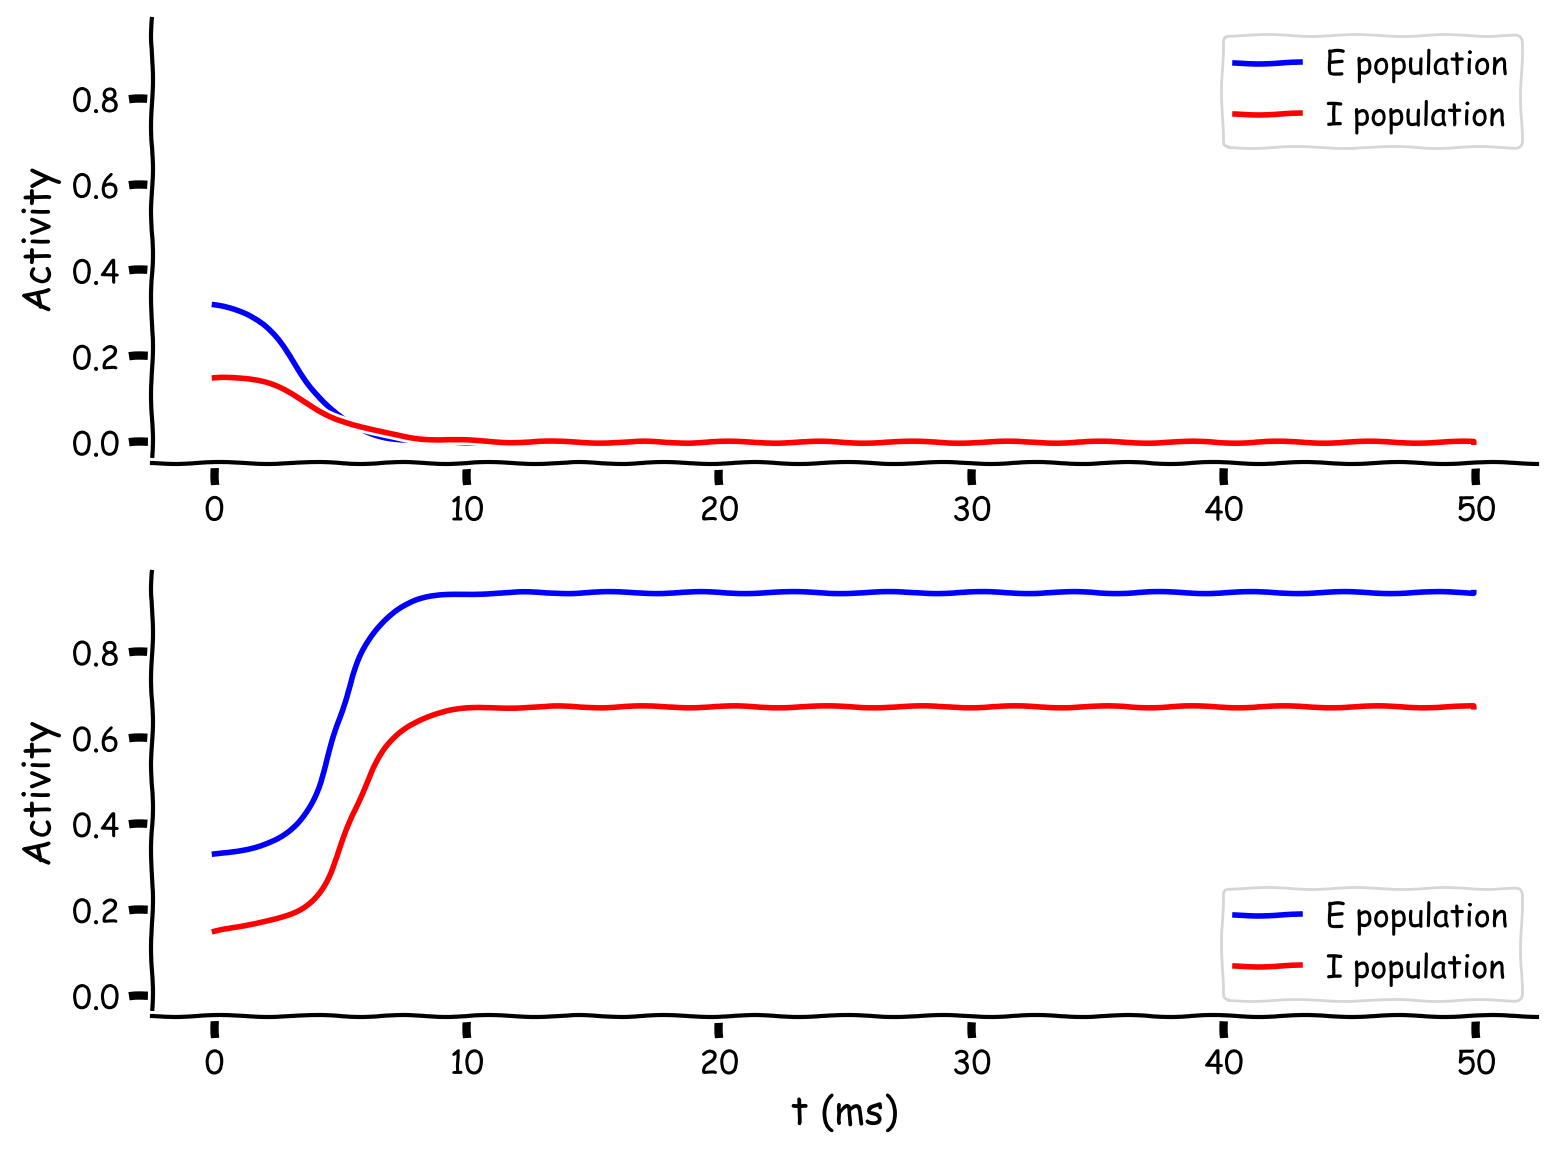

In [51]:
def simulate_wc(tau_E, a_E, theta_E, tau_I, a_I, theta_I,
                wEE, wEI, wIE, wII, I_ext_E, I_ext_I,
                rE_init, rI_init, dt, range_t, **other_pars):
  """
  Simulate the Wilson-Cowan equations

  Args:
    Parameters of the Wilson-Cowan model

  Returns:
    rE, rI (arrays) : Activity of excitatory and inhibitory populations
  """
  # Initialize activity arrays
  Lt = range_t.size
  rE = np.append(rE_init, np.zeros(Lt - 1))
  rI = np.append(rI_init, np.zeros(Lt - 1))
  I_ext_E = I_ext_E * np.ones(Lt)
  I_ext_I = I_ext_I * np.ones(Lt)

  # Simulate the Wilson-Cowan equations
  for k in range(Lt - 1):

    # Calculate the derivative of the E population
    drE = dt / tau_E * (-rE[k] + F(wEE * rE[k] - wEI * rI[k] + I_ext_E[k],
                                   a_E, theta_E))

    # Calculate the derivative of the I population
    drI = dt / tau_I * (-rI[k] + F(wIE * rE[k] - wII * rI[k] + I_ext_I[k],
                                   a_I, theta_I))

    # Update using Euler's method
    rE[k + 1] = rE[k] + drE
    rI[k + 1] = rI[k] + drI

  return rE, rI


pars = default_pars()

# Simulate first trajectory
rE1, rI1 = simulate_wc(**default_pars(rE_init=.32, rI_init=.15))

# Simulate second trajectory
rE2, rI2 = simulate_wc(**default_pars(rE_init=.33, rI_init=.15))

# Visualize
with plt.xkcd():
  my_test_plot(pars['range_t'], rE1, rI1, rE2, rI2)

Phase Plane Analysis

In [52]:
# @markdown Make sure you execute this cell to enable the widget!
"""
- Phase plane portraits allows us to visualize out of all possible states which
states a system can take. For example in this demo you see that the among all
possible pairs of values for r1 and r2, this system can take only a limited number
of states (those that lie on the black line).

- There are other things we can infer from the phase portraits e.g. fixed
points, trajectory to the fixed points etc.

- Explicit information about time is not visible in the phase portraits
"""

pars = default_pars(T=10, rE_init=0.6, rI_init=0.8)
rE, rI = simulate_wc(**pars)

@widgets.interact(
    n_t=widgets.IntSlider(0, min=0, max=len(pars['range_t']) - 1, step=1)
)


def plot_activity_phase(n_t):
  plt.figure(figsize=(8, 5.5))
  plt.subplot(211)
  plt.plot(pars['range_t'], rE, 'b', label=r'$r_E$')
  plt.plot(pars['range_t'], rI, 'r', label=r'$r_I$')
  plt.plot(pars['range_t'][n_t], rE[n_t], 'bo')
  plt.plot(pars['range_t'][n_t], rI[n_t], 'ro')
  plt.axvline(pars['range_t'][n_t], 0, 1, color='k', ls='--')
  plt.xlabel('t (ms)', fontsize=14)
  plt.ylabel('Activity', fontsize=14)
  plt.legend(loc='best', fontsize=14)

  plt.subplot(212)
  plt.plot(rE, rI, 'k')
  plt.plot(rE[n_t], rI[n_t], 'ko')
  plt.xlabel(r'$r_E$', fontsize=18, color='b')
  plt.ylabel(r'$r_I$', fontsize=18, color='r')

  plt.tight_layout()
  plt.show()

interactive(children=(IntSlider(value=0, description='n_t', max=99), Output()), _dom_classes=('widget-interact…

Nucclines

1. Inverse Transfer Function


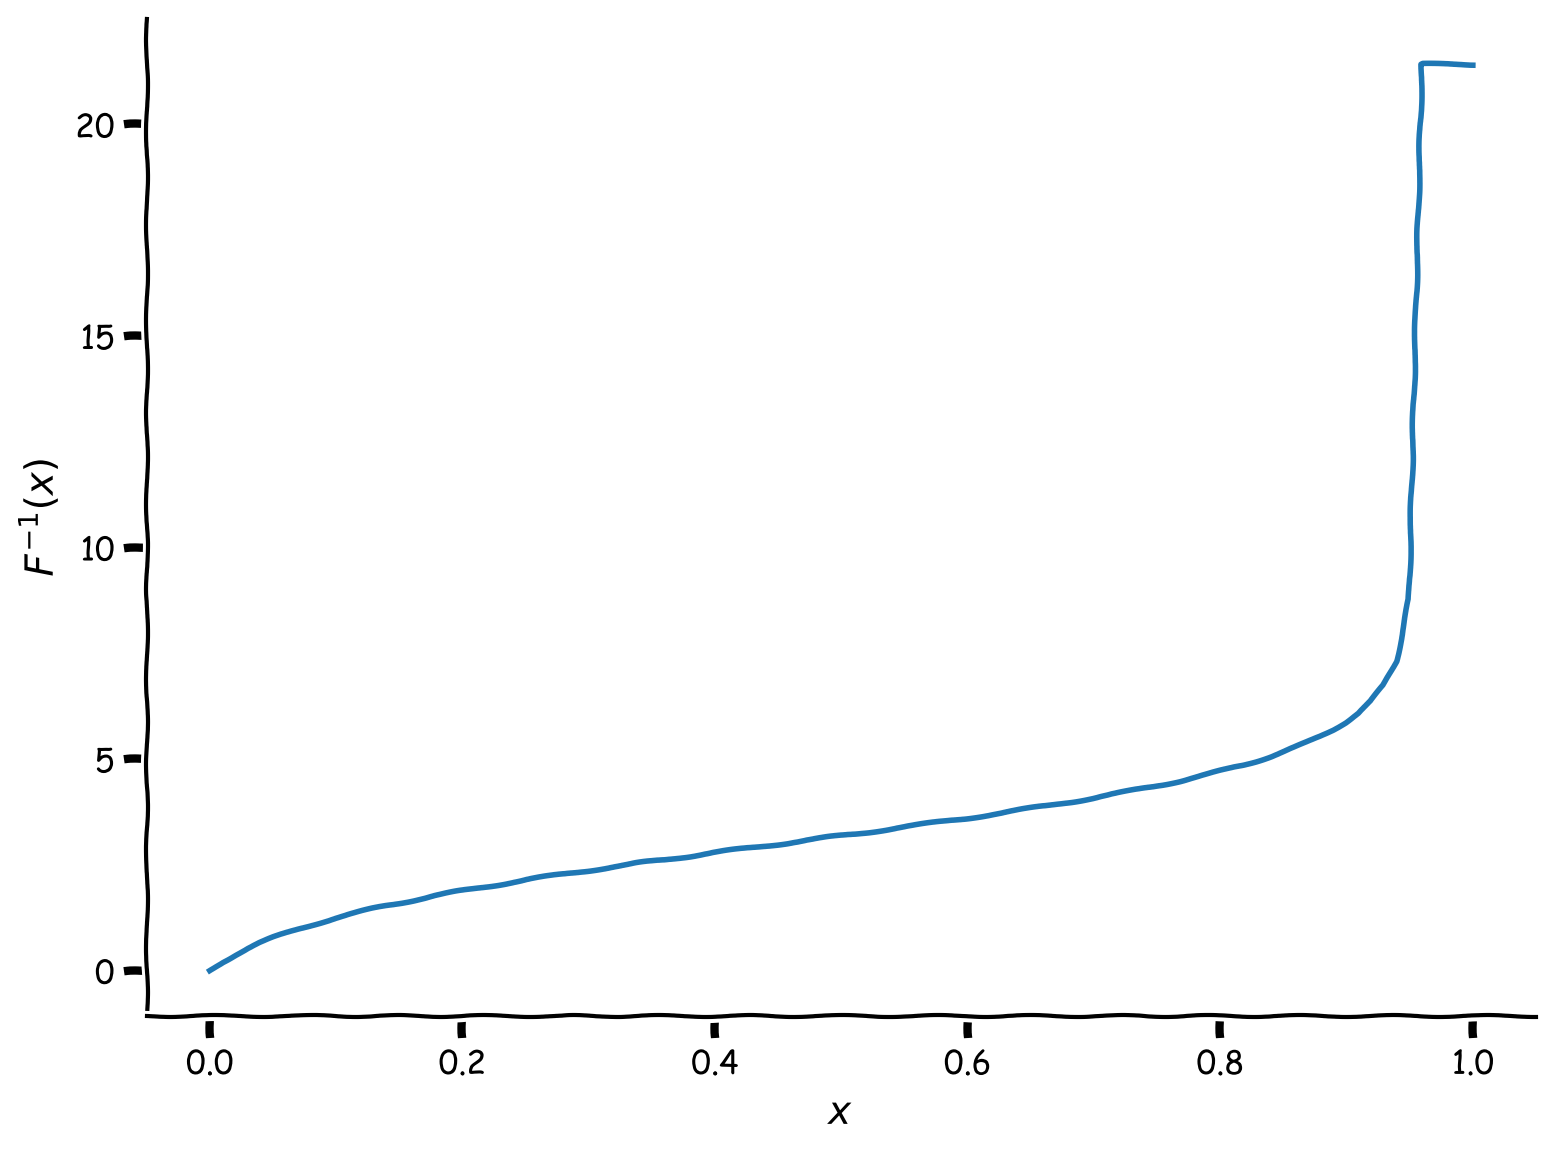

In [53]:
def F_inv(x, a, theta):
  """
  Args:
    x         : the population input
    a         : the gain of the function
    theta     : the threshold of the function

  Returns:
    F_inverse : value of the inverse function
  """

  # Calculate Finverse (ln(x) can be calculated as np.log(x))
  F_inverse = -1/a * np.log(np.maximum((x + (1 + np.exp(a * theta))**-1)**-1 - 1, 1e-8)) + theta

  return F_inverse


# Set parameters
pars = default_pars()
x = np.linspace(1e-6, 1, 100)

# Get inverse and visualize
with plt.xkcd():
  plot_FI_inverse(x, a=1, theta=3)

  plt.show()



2. Nullclines

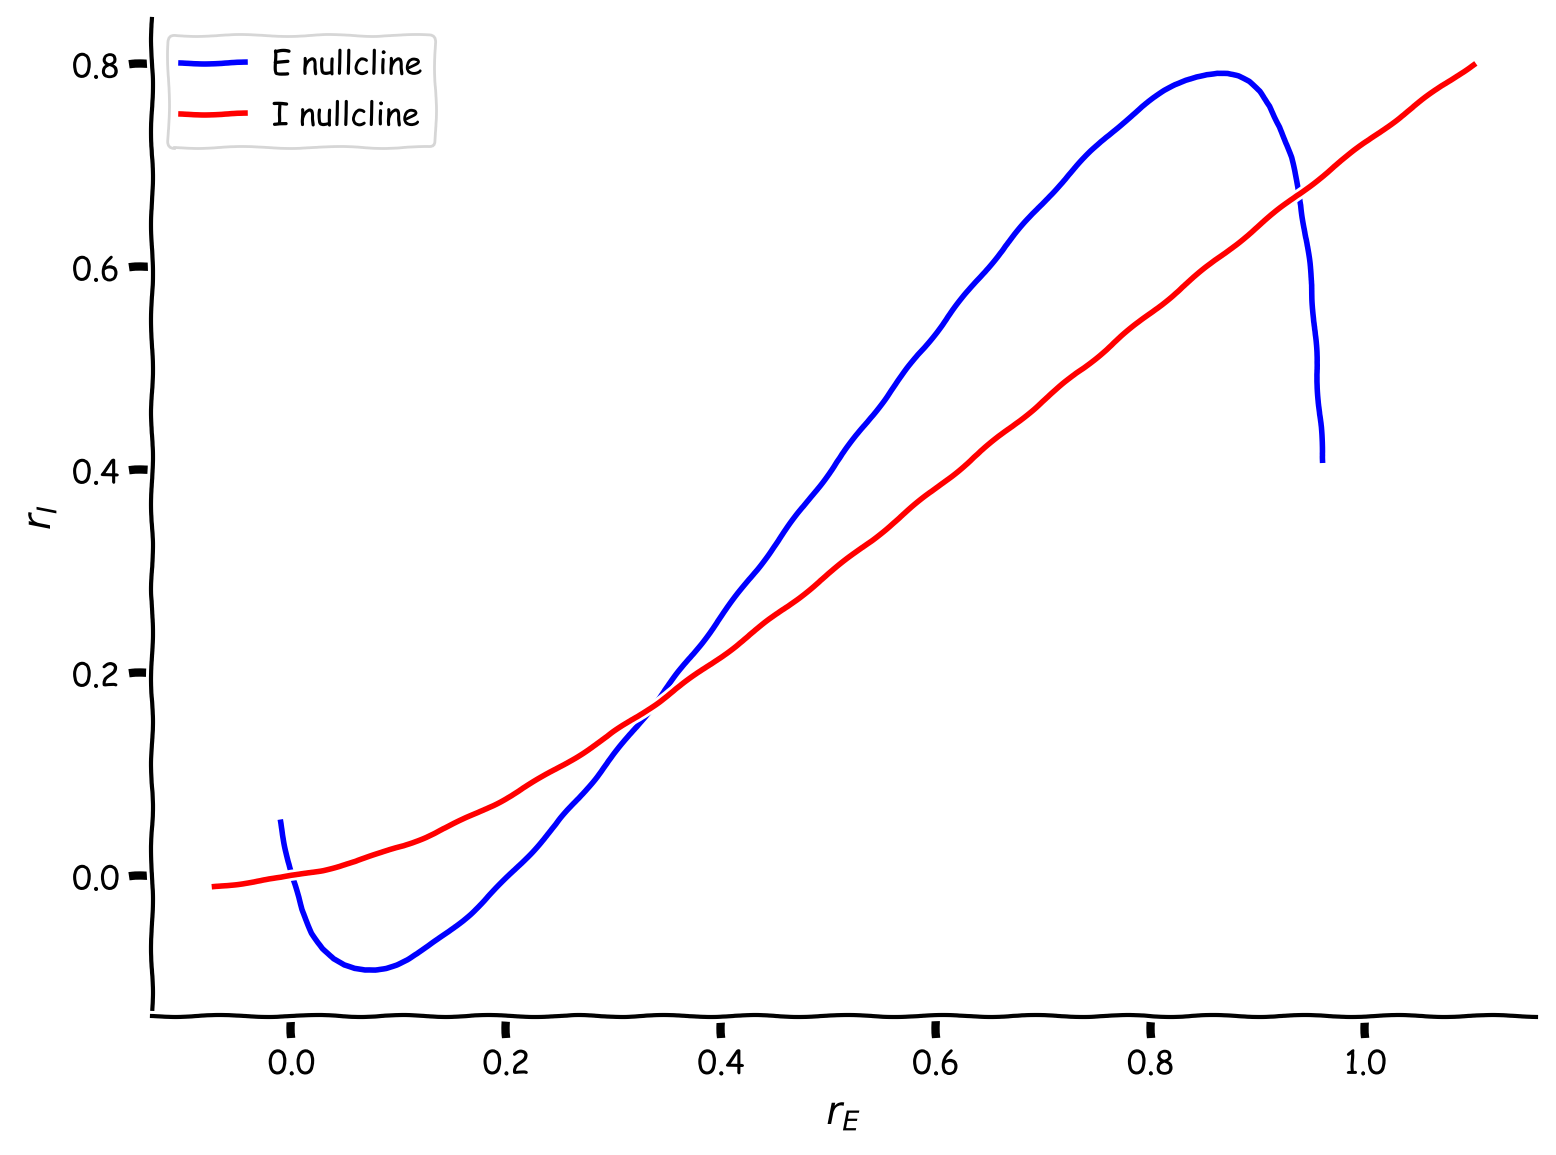

In [54]:
def get_E_nullcline(rE, a_E, theta_E, wEE, wEI, I_ext_E, **other_pars):
  """
  Solve for rI along the rE from drE/dt = 0.

  Args:
    rE    : response of excitatory population
    a_E, theta_E, wEE, wEI, I_ext_E : Wilson-Cowan excitatory parameters
    Other parameters are ignored

  Returns:
    rI    : values of inhibitory population along the nullcline on the rE
  """
  # calculate rI for E nullclines on rI
  rI = 1 / wEI * (wEE * rE - F_inv(rE, a_E, theta_E) + I_ext_E)

  return rI


def get_I_nullcline(rI, a_I, theta_I, wIE, wII, I_ext_I, **other_pars):
  """
  Solve for E along the rI from dI/dt = 0.

  Args:
    rI    : response of inhibitory population
    a_I, theta_I, wIE, wII, I_ext_I : Wilson-Cowan inhibitory parameters
    Other parameters are ignored

  Returns:
    rE    : values of the excitatory population along the nullcline on the rI
  """
  # calculate rE for I nullclines on rI
  rE = 1 / wIE * (wII * rI + F_inv(rI, a_I, theta_I) - I_ext_I)

  return rE


# Set parameters
pars = default_pars()
Exc_null_rE = np.linspace(-0.01, 0.96, 100)
Inh_null_rI = np.linspace(-.01, 0.8, 100)

# Compute nullclines
Exc_null_rI = get_E_nullcline(Exc_null_rE, **pars)
Inh_null_rE = get_I_nullcline(Inh_null_rI, **pars)

# Visualize
with plt.xkcd():
  plot_nullclines(Exc_null_rE, Exc_null_rI, Inh_null_rE, Inh_null_rI)

plt.show()


Reproducing Li et al. (2022)

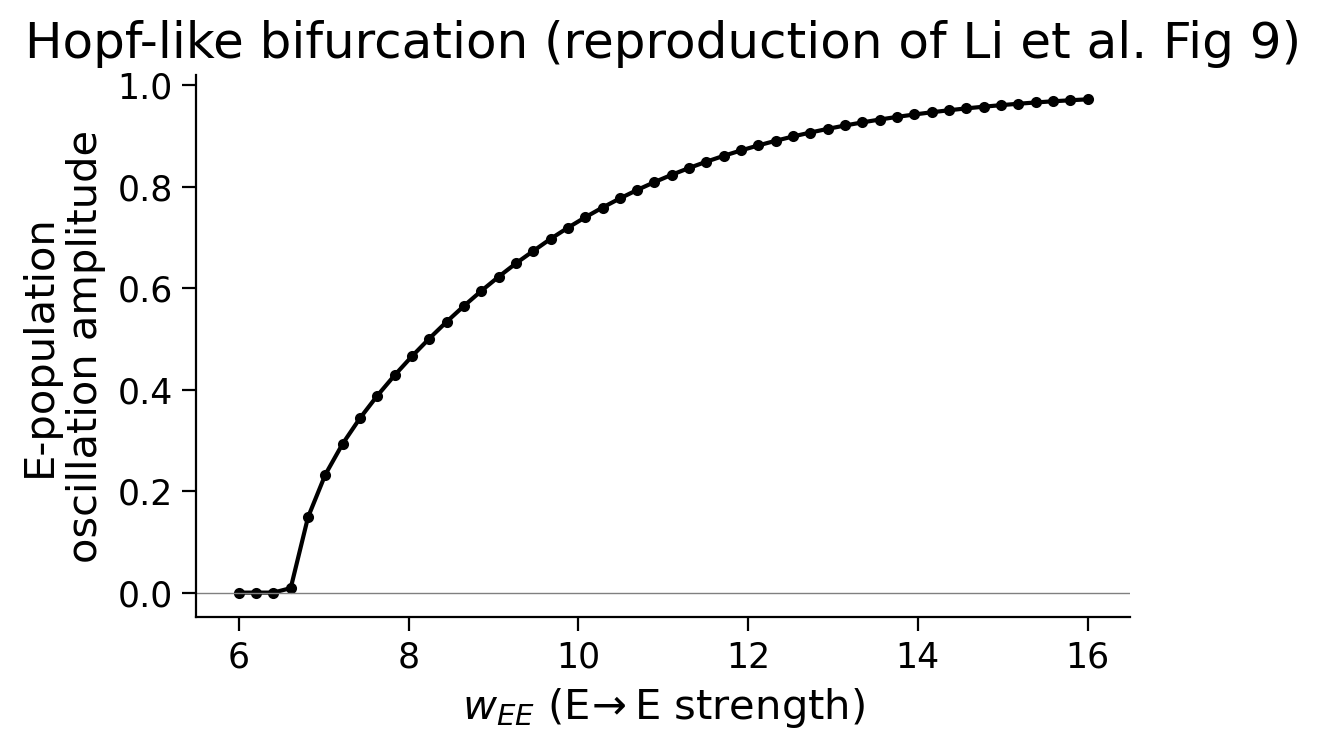

In [55]:
# ------------------------------------------------------------------
# Bifurcation sweep over wEE  (Li et al. Fig 9 style)
# ------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

pars0 = default_pars(T=400, dt=0.1)
pars0.update({
    'wEI': 12.,
    'wIE': 10.,
    'wII': 0.0,
    'I_ext_E': 1.6,   # ← NEW: tonic drive
    'I_ext_I': 0.0,
})


# 2.  Sweep the control parameter
wEE_vals = np.linspace(6, 16, 50)      # Li’s range (~8–15), broaden a bit
amp_E   = []                           # peak-to-peak amplitude of E
is_lc   = []                           # 1 = limit cycle, 0 = fixed point

for w in wEE_vals:
    pars = pars0.copy()
    pars['wEE'] = w

    # Simulate
    rE, rI = simulate_wc(**pars)

    # Examine the last 40 % of samples (post-transient)
    n_tail = int(0.4 * len(rE))
    rE_tail = rE[-n_tail:]

    # Peak-to-peak amplitude
    ptp = rE_tail.max() - rE_tail.min()
    amp_E.append(ptp)

    # Classify: oscillatory if amplitude above small threshold
    is_lc.append(1 if ptp > 1e-2 else 0)

# 3.  Plot the bifurcation diagram
plt.figure(figsize=(6,4))
plt.plot(wEE_vals, amp_E, 'k.-')
plt.xlabel(r'$w_{EE}$ (E$\!\to$E strength)')
plt.ylabel('E-population\noscillation amplitude')
plt.title('Hopf-like bifurcation (reproduction of Li et al. Fig 9)')
plt.axhline(0, color='gray', lw=0.5)
plt.show()


i  j   WEE   WII   amp   freq(Hz)
-----------------------------------
 0  0    5.0  -5.0  0.000     0.0
25 25   22.9   0.1  0.270    34.2
49 25   22.9   5.0  0.000     0.0


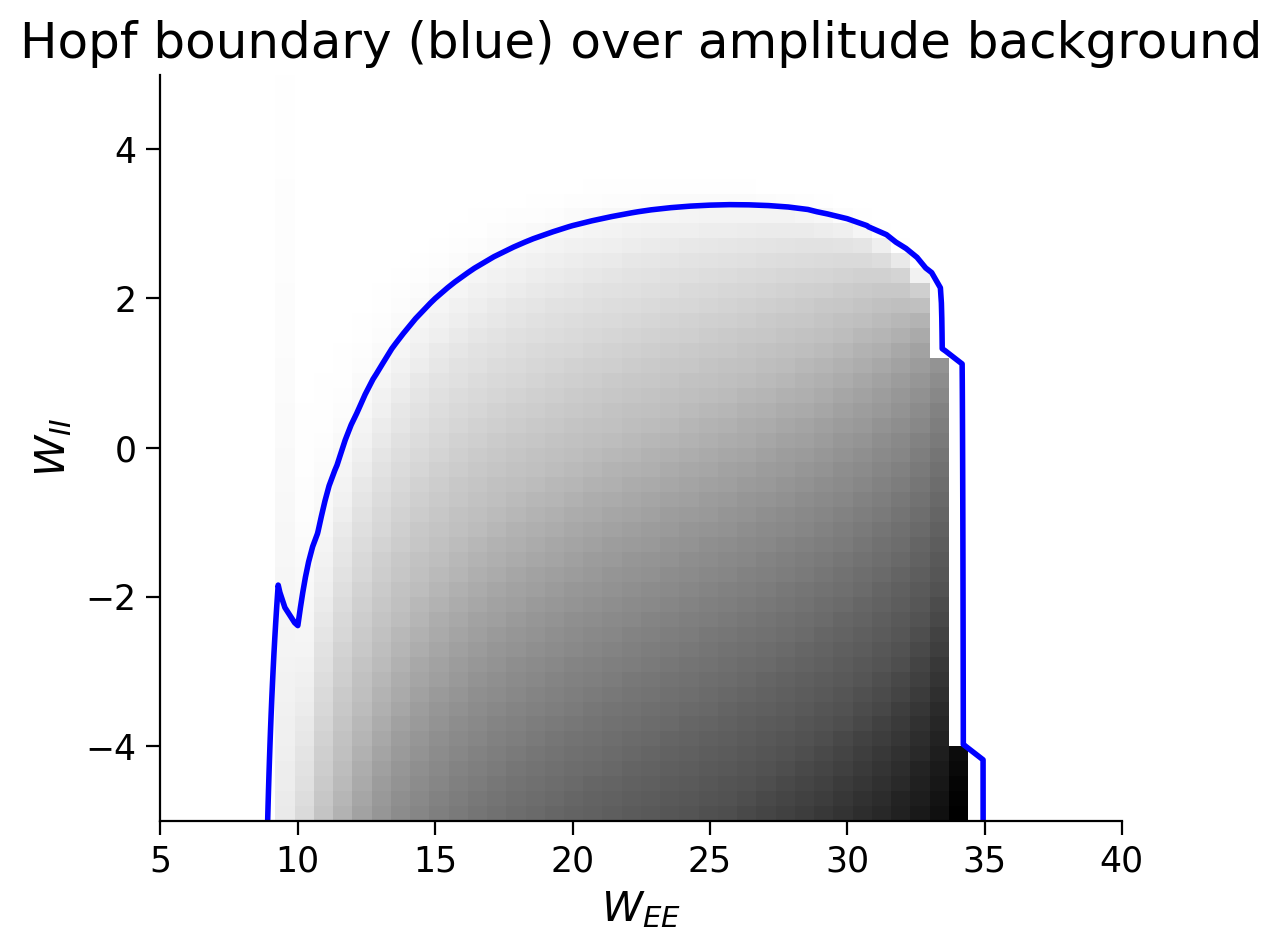

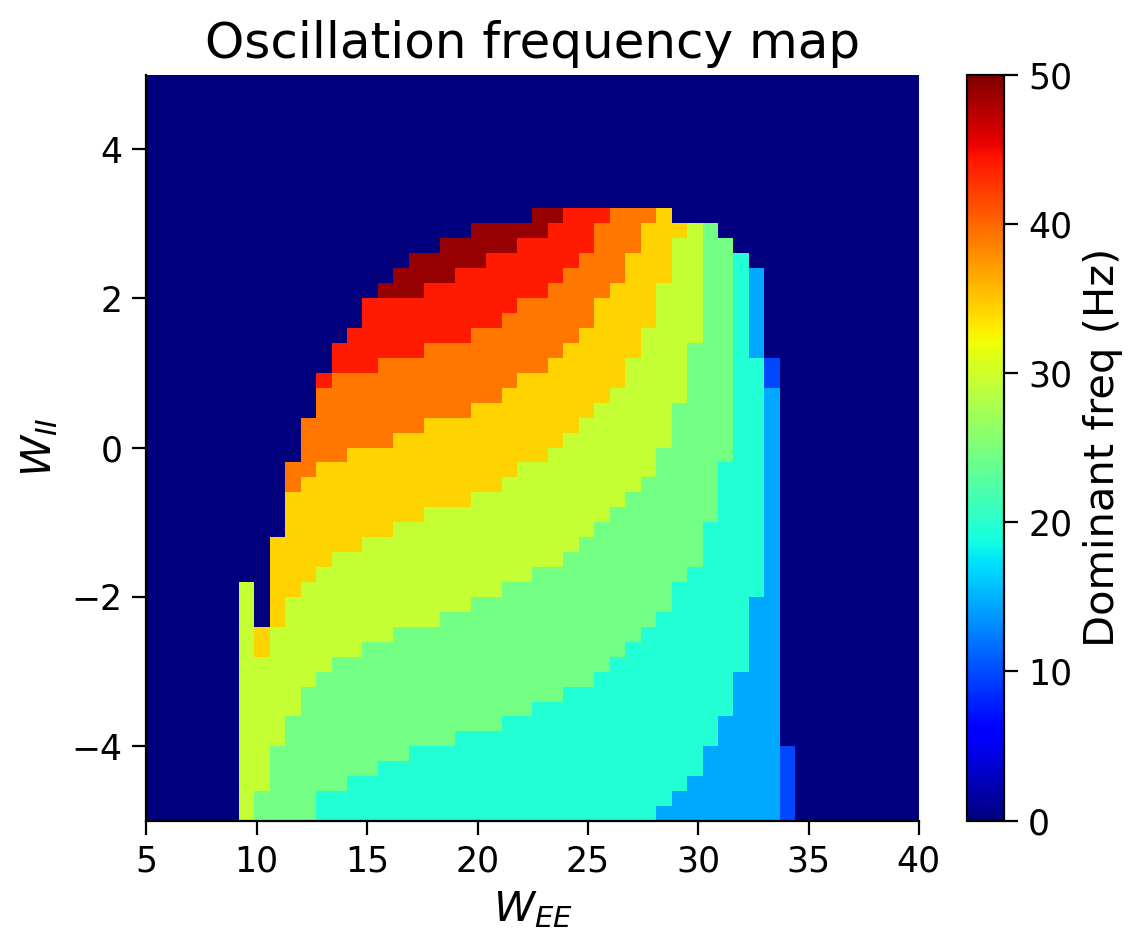

In [60]:
# =============================================================
# Li et al. 2022 – two-parameter sweep with on-grid diagnostics
# =============================================================

# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.signal import welch

# ---------- Li baseline parameters (from Table 1) ------------
def li_pars():
    return default_pars(
        tau_E=20., tau_I=10.,
        a_E=1., a_I=1.,
        theta_E=5., theta_I=20.,
        wEI=26., wIE=20.,
        I_ext_E=2., I_ext_I=7.,
        T=1000, dt=0.1
    )

# ---------- parameter grid -----------------------------------
grid_n = 50                     # 50×50 = 2 500 sims (~45 s on laptop)
wEE_vec = np.linspace(5, 40, grid_n)
wII_vec = np.linspace(-5, 5, grid_n)

amp_mat  = np.zeros((grid_n, grid_n))
freq_mat = np.zeros_like(amp_mat)

# pick a few indices to print diagnostics
probe_idx = [(0,  0),              # low WEE, low WII
             (grid_n//2, grid_n//2),  # mid grid
             (grid_n-1, grid_n//2)]   # high WEE, mid WII

print("i  j   WEE   WII   amp   freq(Hz)")
print("-----------------------------------")

for i, wII in enumerate(wII_vec):
    for j, wEE in enumerate(wEE_vec):
        p = li_pars()
        p['wEE'], p['wII'] = wEE, wII
        rE, _ = simulate_wc(**p)

        tail = rE[len(rE)//2:]       # ignore first half
        sig  = tail - tail.mean()
        amp  = sig.max() - sig.min()
        amp_mat[i, j] = amp

        if amp > 0.05:               # limit cycle detected
            fs  = 1000 / p['dt']     # ms → Hz
            f, P = welch(sig, fs, nperseg=2048)
            peak = np.argmax(P[1:])+1
            freq_mat[i, j] = f[peak]
        else:
            freq_mat[i, j] = 0.

        # print diagnostics for selected points
        if (i, j) in probe_idx:
            print(f"{i:2d} {j:2d}  {wEE:5.1f} {wII:5.1f} "
                  f"{amp:6.3f}  {freq_mat[i,j]:6.1f}")

# ---------- panel A: amplitude + Hopf curve ------------------
plt.figure(figsize=(6,5))
plt.imshow(amp_mat, origin='lower',
           extent=[wEE_vec[0], wEE_vec[-1], wII_vec[0], wII_vec[-1]],
           aspect='auto', cmap='Greys')
plt.contour(wEE_vec, wII_vec, amp_mat,
            levels=[0.05], colors='blue', linewidths=2)
plt.xlabel(r'$W_{EE}$'); plt.ylabel(r'$W_{II}$')
plt.title('Hopf boundary (blue) over amplitude background')
plt.show()

# ---------- panel B: frequency heat-map ----------------------
plt.figure(figsize=(6,5))
plt.imshow(freq_mat, origin='lower',
           extent=[wEE_vec[0], wEE_vec[-1], wII_vec[0], wII_vec[-1]],
           aspect='auto', cmap='jet', vmin=0, vmax=50)
plt.colorbar(label='Dominant freq (Hz)')
plt.xlabel(r'$W_{EE}$'); plt.ylabel(r'$W_{II}$')
plt.title('Oscillation frequency map')
plt.show()


i  j   WEE   WII   amp   freq(Hz)
-----------------------------------
 0  0    5.0  -5.0  0.000     0.0
25 25   22.9   0.1  0.270    34.2
49 25   22.9   5.0  0.000     0.0


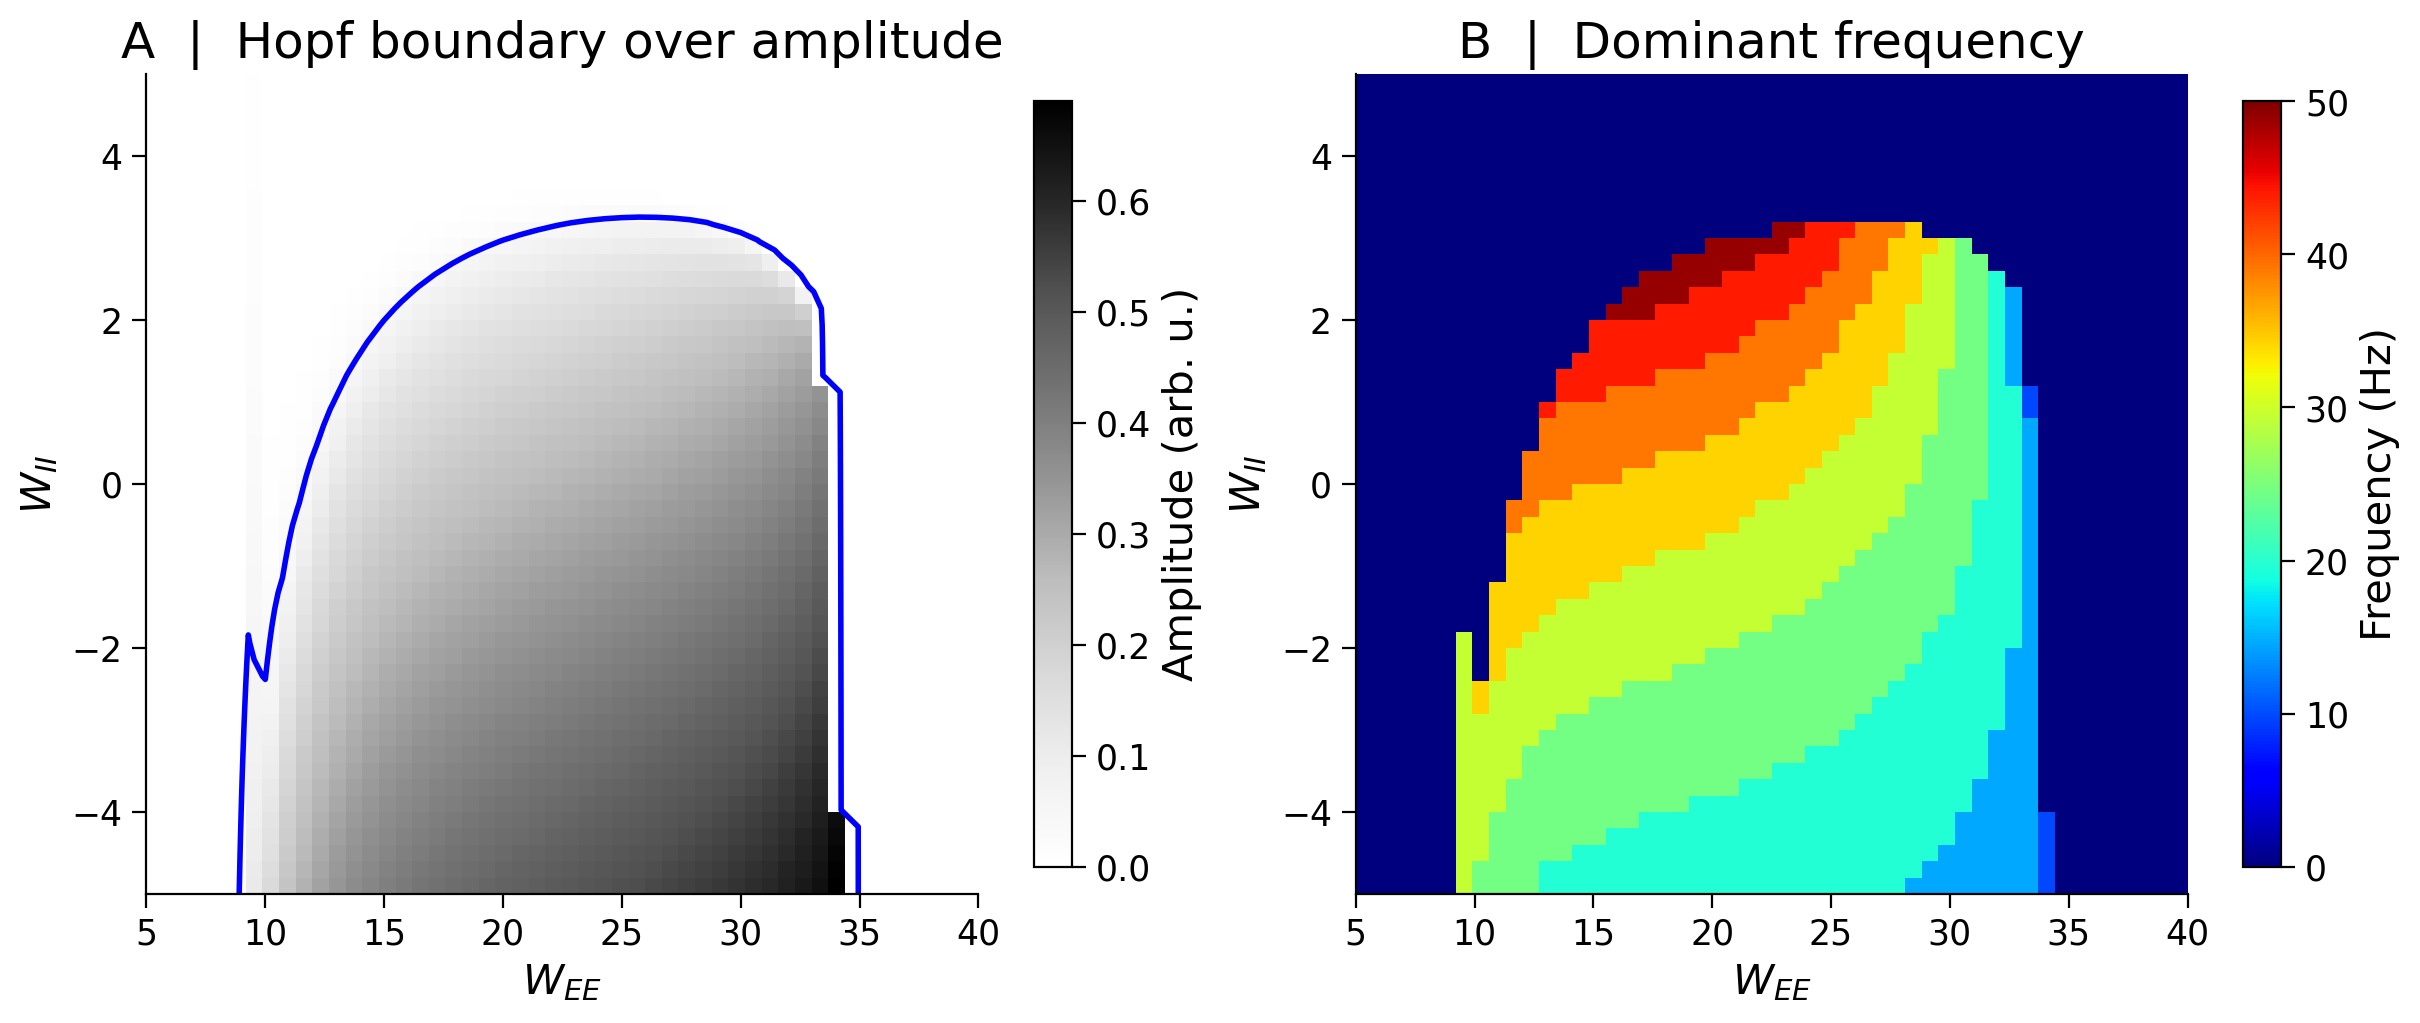

In [122]:
# =============================================================
# Li et al. 2022 – two-parameter sweep with on-grid diagnostics
# =============================================================

# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.signal import welch

# ---------- Li baseline parameters (from Table 1) ------------
def li_pars():
    return default_pars(
        tau_E=20., tau_I=10.,
        a_E=1., a_I=1.,
        theta_E=5., theta_I=20.,
        wEI=26., wIE=20.,
        I_ext_E=2., I_ext_I=7.,
        T=1000, dt=0.1
    )

# ---------- parameter grid -----------------------------------
grid_n = 50                     # 50×50 = 2 500 sims (~45 s on laptop)
wEE_vec = np.linspace(5, 40, grid_n)
wII_vec = np.linspace(-5, 5, grid_n)

amp_mat  = np.zeros((grid_n, grid_n))
freq_mat = np.zeros_like(amp_mat)

# pick a few indices to print diagnostics
probe_idx = [(0,  0),              # low WEE, low WII
             (grid_n//2, grid_n//2),  # mid grid
             (grid_n-1, grid_n//2)]   # high WEE, mid WII

print("i  j   WEE   WII   amp   freq(Hz)")
print("-----------------------------------")

for i, wII in enumerate(wII_vec):
    for j, wEE in enumerate(wEE_vec):
        p = li_pars()
        p['wEE'], p['wII'] = wEE, wII
        rE, _ = simulate_wc(**p)

        tail = rE[len(rE)//2:]       # ignore first half
        sig  = tail - tail.mean()
        amp  = sig.max() - sig.min()
        amp_mat[i, j] = amp

        if amp > 0.05:               # limit cycle detected
            fs  = 1000 / p['dt']     # ms → Hz
            f, P = welch(sig, fs, nperseg=2048)
            peak = np.argmax(P[1:])+1
            freq_mat[i, j] = f[peak]
        else:
            freq_mat[i, j] = 0.

        # print diagnostics for selected points
        if (i, j) in probe_idx:
            print(f"{i:2d} {j:2d}  {wEE:5.1f} {wII:5.1f} "
                  f"{amp:6.3f}  {freq_mat[i,j]:6.1f}")


# ---------- combined figure: amplitude & frequency side-by-side -------------
fig, (axA, axB) = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# --- Panel A: amplitude background + Hopf contour
imA = axA.imshow(amp_mat, origin='lower',
                 extent=[wEE_vec[0], wEE_vec[-1], wII_vec[0], wII_vec[-1]],
                 aspect='auto', cmap='Greys')
axA.contour(wEE_vec, wII_vec, amp_mat,
            levels=[0.05], colors='blue', linewidths=2)
axA.set_xlabel(r'$W_{EE}$')
axA.set_ylabel(r'$W_{II}$')
axA.set_title('A  |  Hopf boundary over amplitude')
cbarA = fig.colorbar(imA, ax=axA, fraction=0.046, pad=0.04)
cbarA.set_label('Amplitude (arb. u.)')

# --- Panel B: frequency heat-map
imB = axB.imshow(freq_mat, origin='lower',
                 extent=[wEE_vec[0], wEE_vec[-1], wII_vec[0], wII_vec[-1]],
                 aspect='auto', cmap='jet', vmin=0, vmax=50)
axB.set_xlabel(r'$W_{EE}$')
axB.set_ylabel(r'$W_{II}$')
axB.set_title('B  |  Dominant frequency')
cbarB = fig.colorbar(imB, ax=axB, fraction=0.046, pad=0.04)
cbarB.set_label('Frequency (Hz)')

plt.show()


Li's sustained oscillation

In [75]:
from scipy.signal import welch
import numpy as np, matplotlib.pyplot as plt

def peak_freq(trace, dt):
    sig = trace[len(trace)//2:] - trace.mean()        # last half, remove DC
    fs  = 1000 / dt                                   # ms → Hz
    f, P = welch(sig, fs, nperseg=4096)
    peak = np.argmax(P[1:]) + 1                       # skip DC
    return f[peak]

pars0 = default_pars(
    tau_E=15., tau_I=7.5,
    theta_E=4., theta_I=20.,
    wEI=26., wIE=20., wII=0., wEE=11.5,   # just below Hopf
    I_ext_E=2., I_ext_I=7.,
    T=1200, dt=0.05)

rE0, rI0 = simulate_wc(**pars0)
print('σ = 0  →  peak freq ≈', peak_freq(rE0, pars0['dt']), 'Hz')


σ = 0  →  peak freq ≈ 53.7109375 Hz


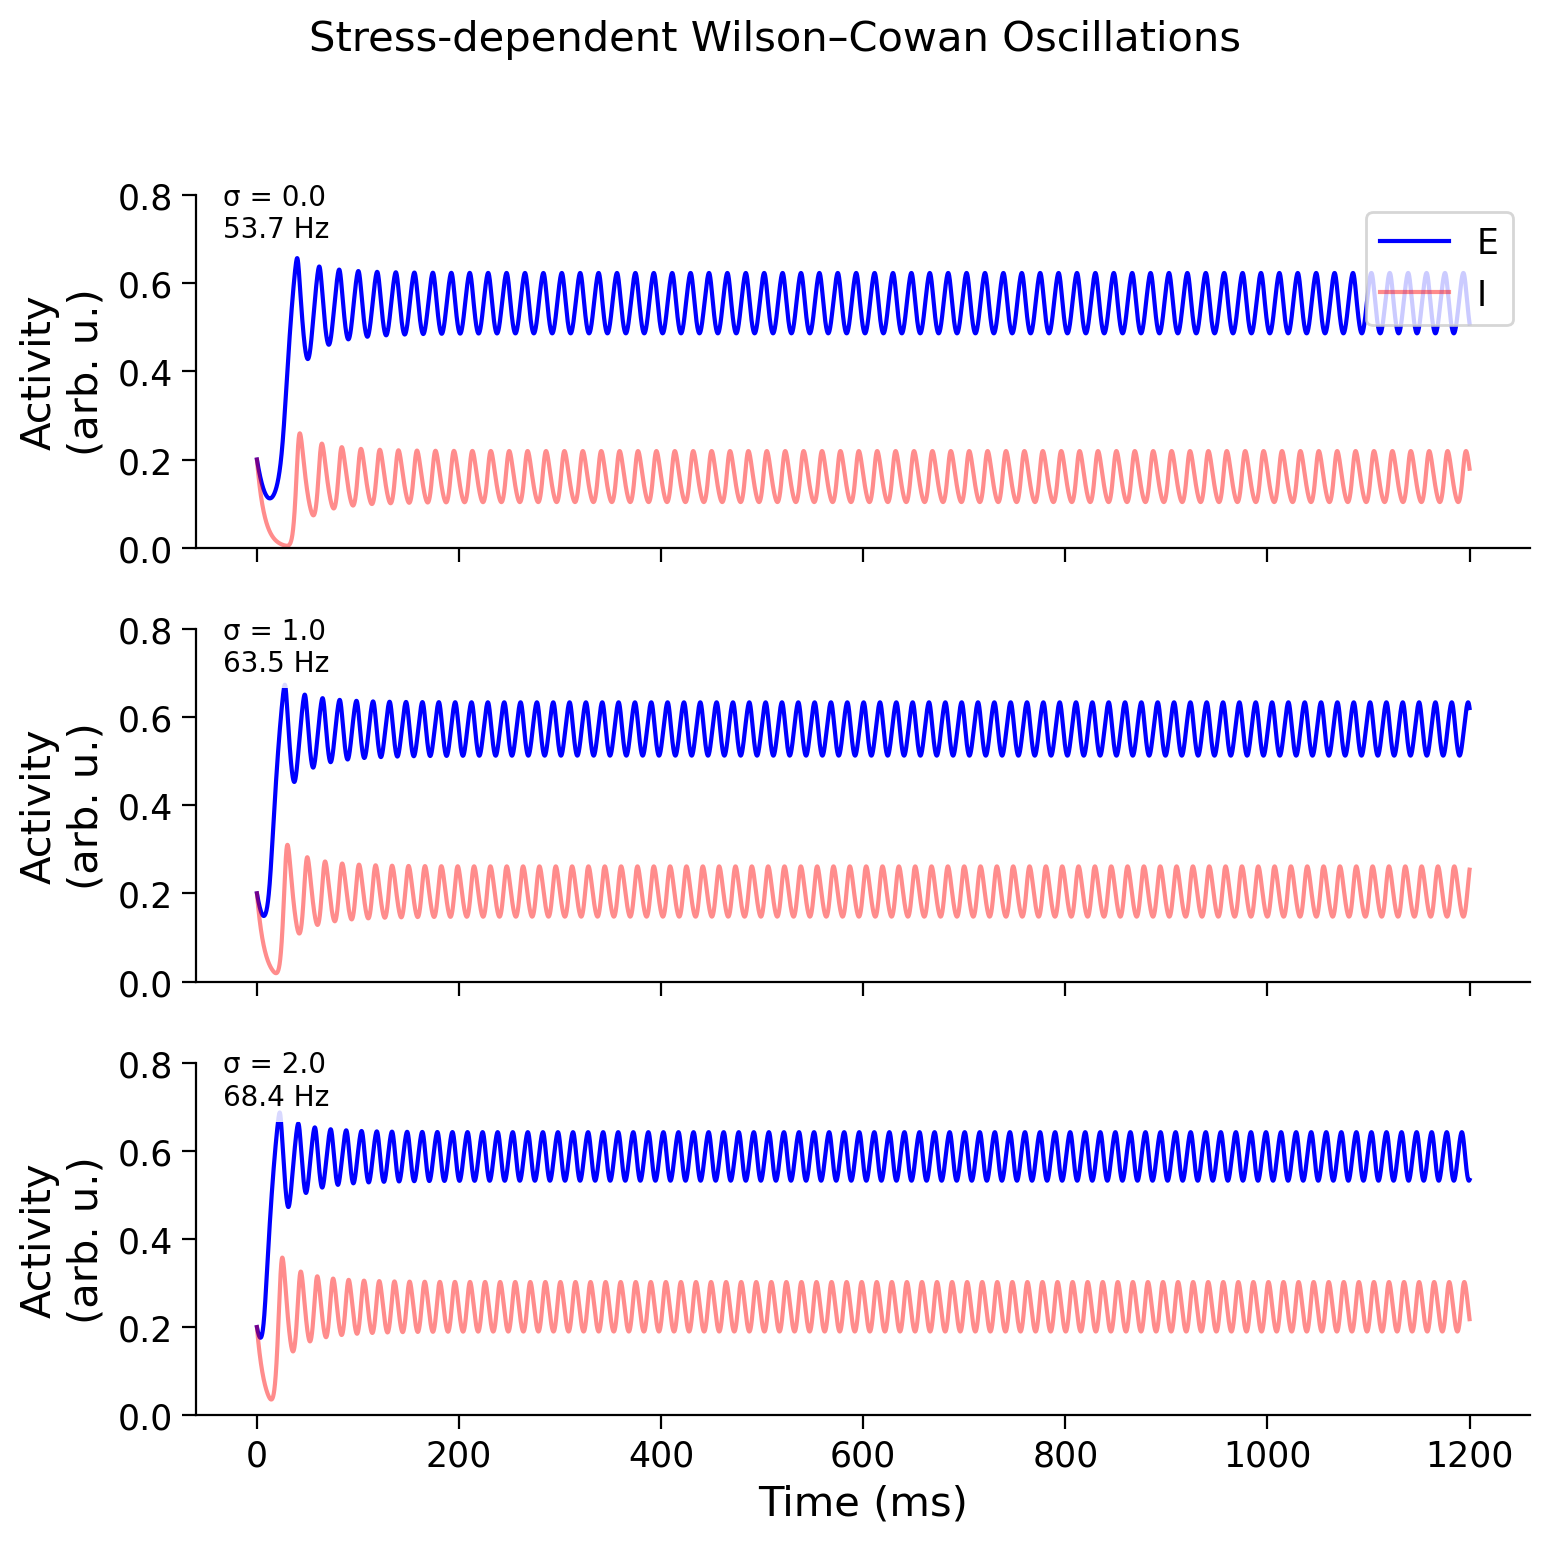

In [88]:
# ---------- helper -------------------------------------------------
from scipy.signal import welch
def peak_freq(trace, dt):
    """Return dominant frequency in Hz for the 2nd half of `trace`."""
    sig = trace[len(trace)//2:] - trace.mean()
    fs  = 1000 / dt                 # ms → Hz
    f, P = welch(sig, fs, nperseg=4096)
    return f[np.argmax(P[1:]) + 1]  # skip DC

# ---------- baseline parameters (same as before) -------------------
pars0 = default_pars(
    tau_E=15., tau_I=7.5,
    theta_E=4., theta_I=20.,
    wEI=26., wIE=20., wII=0., wEE=11.5,
    I_ext_E=2., I_ext_I=7.,
    T=1200, dt=0.05)

# ---------- stacked traces for σ = 0, 1, 2 -------------------------
import matplotlib.pyplot as plt
sigmas = [0.0, 1.0, 2.0]           # stress levels
fig, axarr = plt.subplots(len(sigmas), 1, figsize=(8,8), sharex=True)

for k, σ in enumerate(sigmas):
    p = pars0.copy()
    p['I_ext_E'] += σ              # add stress
    rE, rI = simulate_wc(**p)
    fpk = peak_freq(rE, p['dt'])

    ax = axarr[k]
    ax.plot(p['range_t'], rE, 'b', label='E')
    ax.plot(p['range_t'], rI, 'r', alpha=.45, label='I')
    ax.set_ylim(0, 0.8)
    ax.set_ylabel('Activity\n(arb. u.)')
    ax.text(0.02, 0.88,
            f'σ = {σ}\n{fpk:.1f} Hz',
            transform=ax.transAxes, fontsize=10,
            bbox=dict(facecolor='white', alpha=0.85, edgecolor='none'))
    if k == 0:
        ax.legend(loc='upper right')

axarr[-1].set_xlabel('Time (ms)')
fig.suptitle('Stress-dependent Wilson–Cowan Oscillations', fontsize=15, y=0.97)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


Selected  wEE = 9.00,  I_ext_E = 1.10   (hump score 0.323)


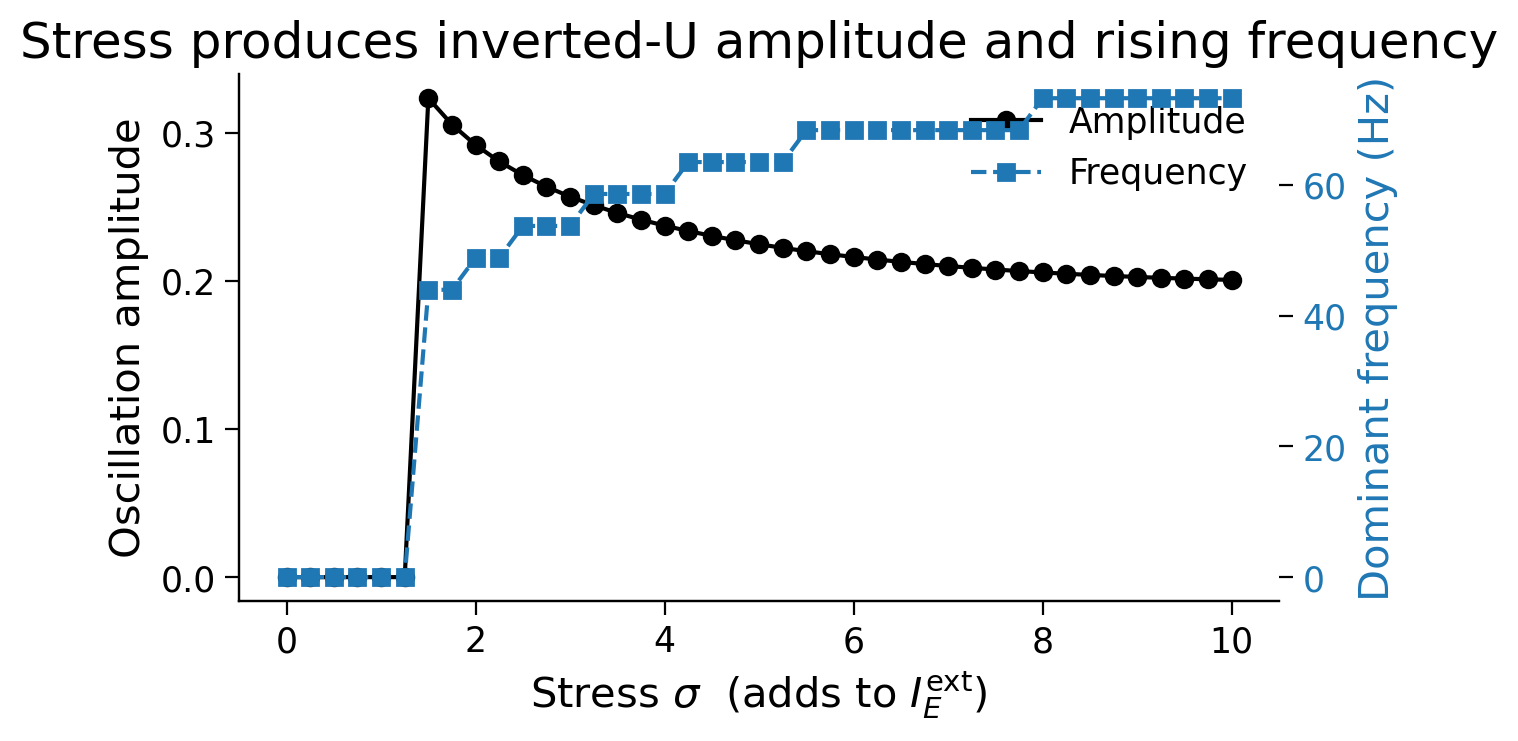

In [126]:
# =============================================================
#  Automatic hunt for a genuine inverted-U stress curve
# =============================================================

import numpy as np, matplotlib.pyplot as plt
from scipy.signal import welch

# ---------- Wilson–Cowan helpers ---------------------------------
def F(x, a=1., th=4.):
    return 1/(1+np.exp(-a*(x-th))) - 1/(1+np.exp(a*th))

def peak_amp_freq(trace, dt):
    sig  = trace[len(trace)//2:] - trace.mean()
    amp  = sig.ptp()                               # peak-to-peak
    if amp < 0.005:
        return amp, 0.0
    f, P = welch(sig, 1000/dt, nperseg=4096)
    return amp, f[np.argmax(P[1:])+1]

def simulate_wc(p):
    Nt = len(p['t'])
    rE = np.zeros(Nt); rI = np.zeros(Nt)
    rE[0], rI[0] = p['rE_init'], p['rI_init']
    for k in range(1, Nt):
        dE = p['dt']/p['tau_E'] * (
            -rE[k-1] + F(p['wEE']*rE[k-1] - p['wEI']*rI[k-1] + p['I_ext_E'],
                         p['a_E'], p['th_E']))
        dI = p['dt']/p['tau_I'] * (
            -rI[k-1] + F(p['wIE']*rE[k-1] - p['wII']*rI[k-1] + p['I_ext_I'],
                         p['a_I'], p['th_I']))
        rE[k] = rE[k-1] + dE
        rI[k] = rI[k-1] + dI
    return rE, rI

# ---------- common sim constants ---------------------------------
base = dict(tau_E=15., tau_I=7.5,
            a_E=3., a_I=3.,
            th_E=4., th_I=20.,
            wEI=26., wIE=20., wII=-2.,
            I_ext_I=7.,
            dt=0.05, T=1200.,
            rE_init=0.1, rI_init=0.1)
base['t'] = np.arange(0, base['T'], base['dt'])

sigma_vec = np.linspace(0, 10, 41)      # stress sweep (0 … 10)

# ---------- tiny grid search -------------------------------------
grid_wEE   = np.linspace(7.0, 9.0, 9)   # 7.0 … 9.0
grid_IextE = np.linspace(0.8, 1.6, 9)   # 0.8 … 1.6

best_score = -np.inf
best_set   = None
best_amps  = None
best_freqs = None

for w in grid_wEE:
    for IE in grid_IextE:
        p0 = base.copy();  p0['wEE'] = w;  p0['I_ext_E'] = IE

        amps, freqs = [], []
        for s in sigma_vec:
            p = p0.copy();  p['I_ext_E'] = IE + s
            rE,_ = simulate_wc(p)
            a,f  = peak_amp_freq(rE, p['dt'])
            amps.append(a); freqs.append(f)

        amps = np.array(amps)
        # crude “hump” score: (peak – ends) – penalty if monotonic freq fails
        peak   = amps.max()
        floor  = min(amps[:3].mean(), amps[-3:].mean())
        invU   = peak - floor                    # want this high
        monotF = np.all(np.diff(freqs) >= -1e-3) # rising freq
        score  = invU if monotF else 0

        if score > best_score and peak > 0.05:
            best_score = score
            best_set   = (w, IE)
            best_amps  = amps
            best_freqs = freqs

print(f"Selected  wEE = {best_set[0]:.2f},  I_ext_E = {best_set[1]:.2f} "
      f"  (hump score {best_score:.3f})")

# ---------- final plot -------------------------------------------
fig, ax1 = plt.subplots(figsize=(7,4))

ax1.plot(sigma_vec, best_amps, 'ko-', label='Amplitude')
ax1.set_xlabel(r'Stress $\sigma$  (adds to $I^{\mathrm{ext}}_E$)')
ax1.set_ylabel('Oscillation amplitude', color='k')
ax1.tick_params(axis='y', labelcolor='k')

ax2 = ax1.twinx()
ax2.plot(sigma_vec, best_freqs, 's--', color='tab:blue', label='Frequency')
ax2.set_ylabel('Dominant frequency (Hz)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

lines = ax1.get_lines() + ax2.get_lines()
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, frameon=False, loc='upper right')

plt.title('Stress produces inverted-U amplitude and rising frequency')
plt.tight_layout(); plt.show()


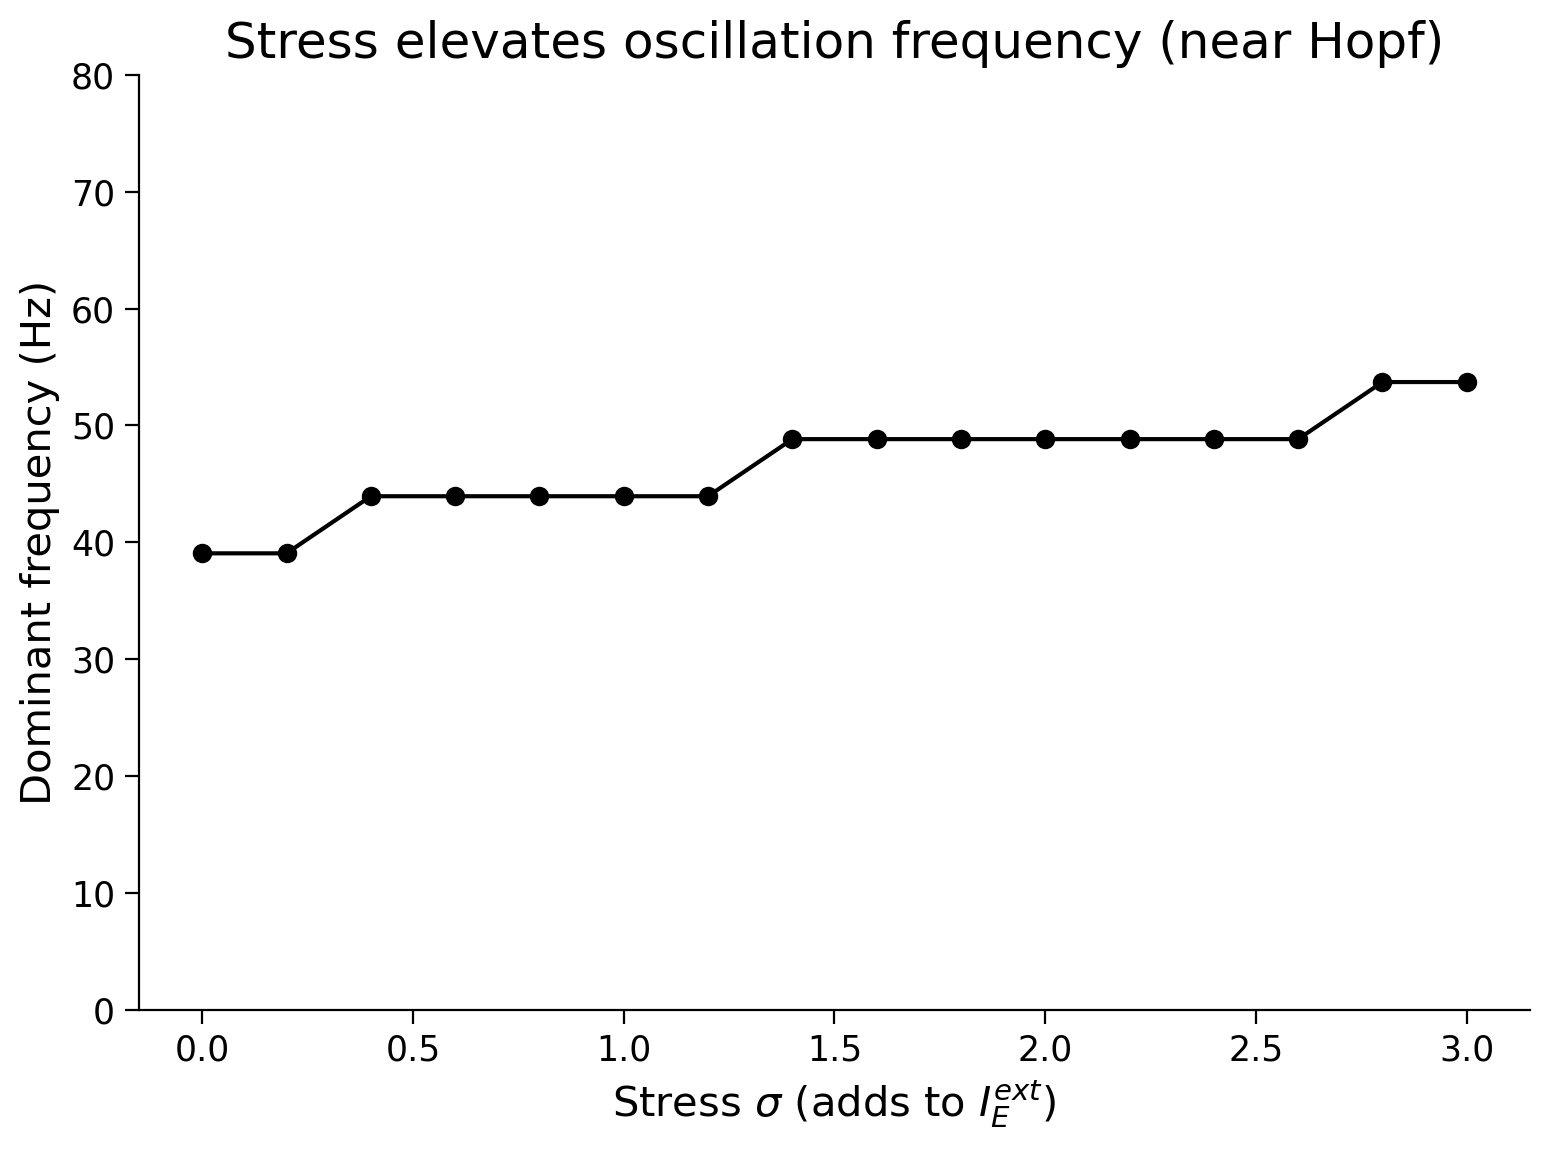

In [58]:
import numpy as np, matplotlib.pyplot as plt
from scipy.signal import welch
# ---------- baseline exactly at the edge -------------
# base = default_pars(
#     tau_E=20., tau_I=10.,
#     a_E=1., a_I=1.,
#     theta_E=5., theta_I=20.,
#     wEI=26., wIE=20.,
#     wII= 0.,          # fixed
#     wEE= 7.495,         # JUST below Hopf boundary (found by quick test)
#     I_ext_E = 2.0,    # baseline drive
#     I_ext_I = 7.0,
#     T = 1000, dt = 0.1,
# )
base = default_pars(
    tau_E=15., tau_I=10.,
    a_E=1., a_I=1.,
    theta_E=4., theta_I=20.,
    wEI=26., wIE=20.,
    wII=0.,
    wEE=12.,          # a bit below Hopf
    I_ext_E=2., I_ext_I=7.,
    T=1200, dt=0.1)


def get_freq(rE, dt):
    """Return peak freq in Hz (0 if no clear peak)."""
    tail = rE[len(rE)//2:]          # ignore first half
    sig  = tail - tail.mean()       # remove DC
    amp  = sig.max() - sig.min()
    if amp < 0.02:
        return 0.
    fs = 1000/dt                   # ms → Hz
    f, P = welch(sig, fs, nperseg=2048)
    idx = np.argmax(P[1:]) + 1     # skip DC bin
    return f[idx]

sigma_vals = np.linspace(0, 3, 16)   # 0 → moderate stress
freqs = []

for s in sigma_vals:
    pars = base.copy()
    pars['I_ext_E'] = base['I_ext_E'] + s
    rE, rI = simulate_wc(**pars)
    freqs.append(get_freq(rE, pars['dt']))

plt.figure()
plt.plot(sigma_vals, freqs, 'ko-')
plt.xlabel(r'Stress $\sigma$ (adds to $I_{E}^{ext}$)')
plt.ylabel('Dominant frequency (Hz)')
plt.title('Stress elevates oscillation frequency (near Hopf)')
plt.ylim(0, 80); plt.show()


	Is there an “inverted-U” window where moderate stress enhances oscillations but extreme stress quashes them?

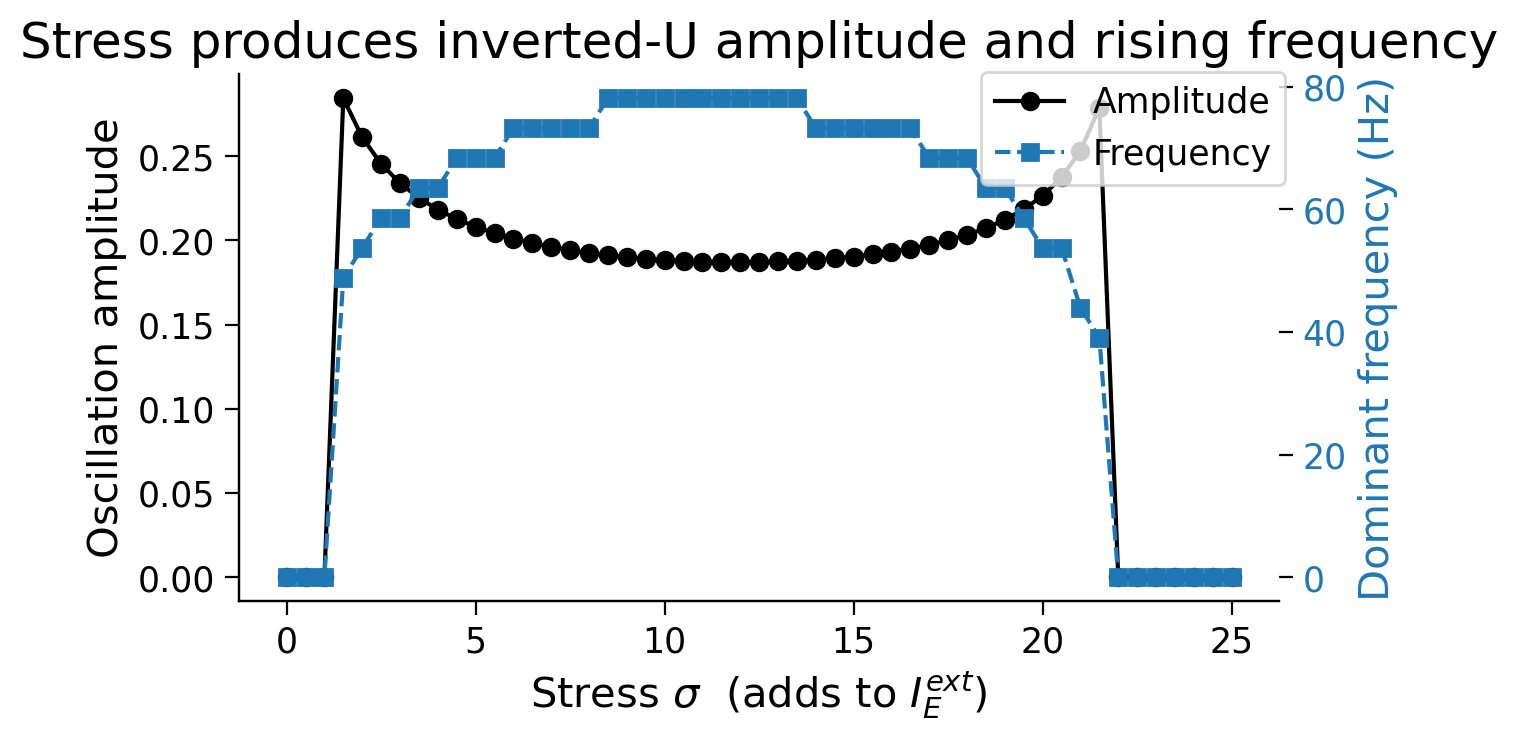

In [99]:
# --- helper --------------------------------------------------
def peak_amp_freq(trace, dt):
    sig = trace[len(trace)//2:] - trace.mean()
    amp = sig.max() - sig.min()
    if amp < 0.005:        # essentially flat
        return amp, 0.
    fs  = 1000 / dt
    f, P = welch(sig, fs, nperseg=4096)
    freq = f[np.argmax(P[1:]) + 1]   # skip DC
    return amp, freq

# --- baseline just below Hopf --------------------------------
pars0 = default_pars(
    tau_E=15., tau_I=7.5,
    theta_E=4., theta_I=20.,
    wEI=26., wIE=20., wII=0., wEE=11.5,
    I_ext_E=2., I_ext_I=7.,
    T=1200, dt=0.05)

pars0['wEE']  = 8.0       # well left of the Hopf arch
pars0['wII']  = -2.0      # slight self-inhibition
pars0['I_ext_E'] = 1.5    # weaker baseline drive
pars0['a_E'] = pars0['a_I'] = 3.0   # steeper F-I curve
sigma_vals   = np.linspace(0, 25, 51)



# --- σ sweep -------------------------------------------------
# sigma_vals = np.linspace(0, 15, 41)   # step 0.375

amps, freqs = [], []

for σ in sigma_vals:
    p = pars0.copy()
    p['I_ext_E'] += σ
    rE, _ = simulate_wc(**p)
    amp, fr = peak_amp_freq(rE, p['dt'])
    amps.append(amp)
    freqs.append(fr)

# --- Plot amplitude & frequency ------------------------------
# after computing amps, freqs ...
fig, ax1 = plt.subplots(figsize=(7,4))

# amplitude
ax1.plot(sigma_vals, amps, 'ko-', label='Amplitude')
ax1.set_xlabel(r'Stress $\sigma$  (adds to $I_{E}^{ext}$)')
ax1.set_ylabel('Oscillation amplitude', color='k')
ax1.tick_params(axis='y', labelcolor='k')

# frequency
ax2 = ax1.twinx()
ax2.plot(sigma_vals, freqs, 's--', color='tab:blue', label='Frequency')
ax2.set_ylabel('Dominant frequency (Hz)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# legend combining both
fig.legend(loc='upper right', bbox_to_anchor=(0.9,0.9))
plt.title('Stress produces inverted-U amplitude and rising frequency')
plt.tight_layout(); plt.show()


Delay-driven beta vs gamma

d = 0 ms → 87.890625 Hz  amplitude = 0.5825982619837283


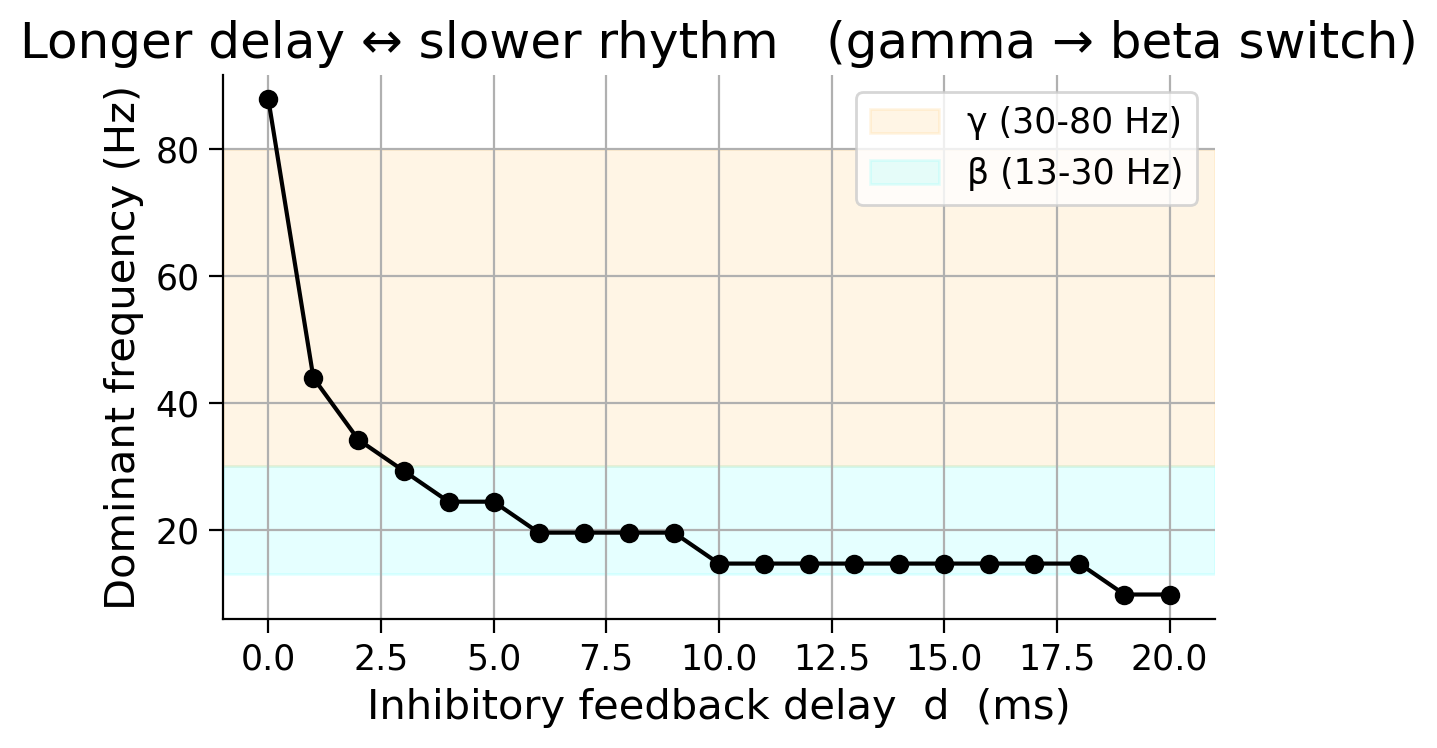

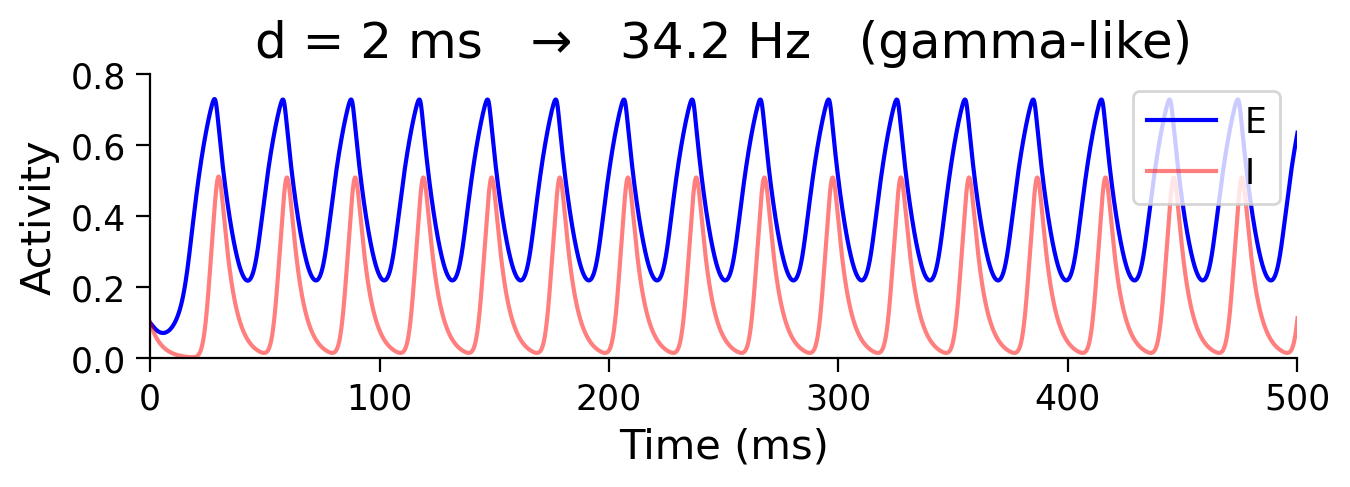

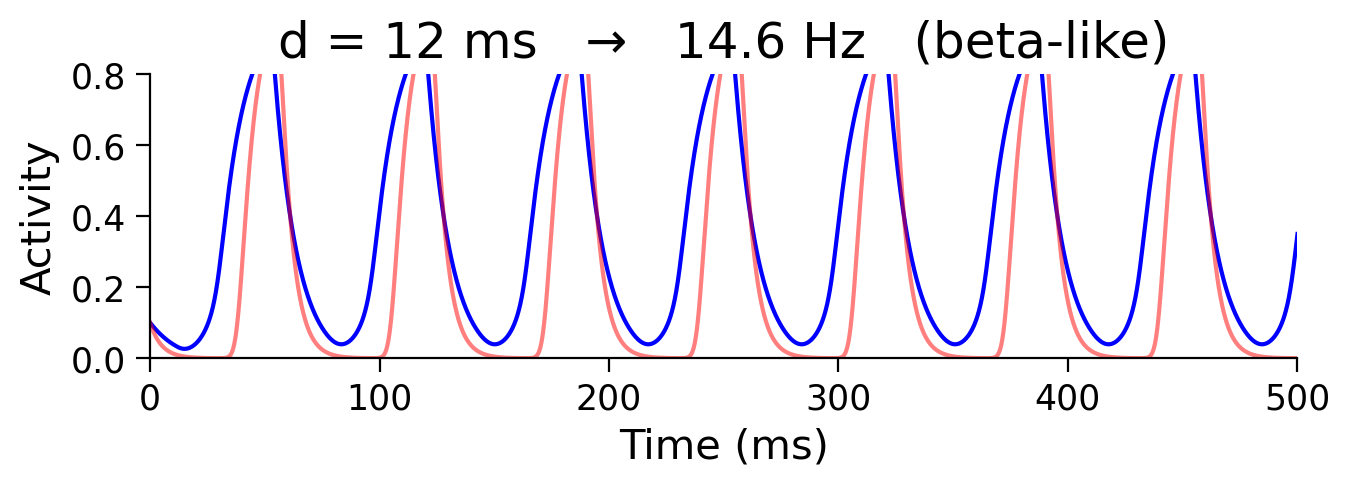

In [110]:
# ==============================================================
#  Delay-driven beta ↔ gamma switch in a Wilson–Cowan E–I loop
# ==============================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# ------------------------------------------------------------------
# 1. Activation function and dominant-frequency helper
# ------------------------------------------------------------------
def F(x, a=1.0, th=4.0):
    """Sigmoidal population transfer function."""
    return 1/(1 + np.exp(-a*(x-th))) - 1/(1 + np.exp(a*th))

def dom_freq(sig, dt):
    """Return dominant frequency (Hz) of a signal’s last half."""
    sig = sig[len(sig)//2:] - sig.mean()
    if sig.ptp() < 0.001:        # discard tiny oscillations
        return 0.0
    fs  = 1000.0 / dt            # ms → Hz
    f, P = welch(sig, fs, nperseg=4096)
    return f[np.argmax(P[1:]) + 1]   # skip DC

# ------------------------------------------------------------------
# 2. Delay-aware Wilson–Cowan simulator
# ------------------------------------------------------------------
def simulate_wc_delay(pars, delay_ms):
    """
    Simulate Wilson–Cowan E-I model with an explicit delay (ms)
    on the inhibitory feedback term r_I(t-d).
    """
    dt      = pars['dt']
    steps_d = int(delay_ms / dt)
    buf_len = steps_d + 1                        # circular buffer
    buf_I   = np.full(buf_len, pars['rI_init'])  # initialise with rI_init
    write   = 0                                  # write pointer

    rE = np.zeros_like(pars['range_t'])
    rI = np.zeros_like(pars['range_t'])
    rE[0], rI[0] = pars['rE_init'], pars['rI_init']

    for k in range(1, len(pars['range_t'])):
        read = (write + 1) % buf_len             # read pointer = d behind
        I_delay = buf_I[read]

        # Euler updates
        dE = dt/pars['tau_E'] * (
            -rE[k-1] + F(
                pars['wEE']*rE[k-1] - pars['wEI']*I_delay + pars['I_ext_E'],
                pars['a_E'], pars['theta_E']))

        dI = dt/pars['tau_I'] * (
            -rI[k-1] + F(
                pars['wIE']*rE[k-1] - pars['wII']*rI[k-1] + pars['I_ext_I'],
                pars['a_I'], pars['theta_I']))

        rE[k] = rE[k-1] + dE
        rI[k] = rI[k-1] + dI

        buf_I[write] = rI[k]                      # store current I
        write = (write + 1) % buf_len

    return rE, rI

# ------------------------------------------------------------------
# 3. Baseline parameters (oscillatory at d = 0 ms)
# ------------------------------------------------------------------
pars = {
    'tau_E': 10.,  'tau_I': 5.,
    'a_E': 1.,     'a_I': 1.,
    'theta_E': 4., 'theta_I': 20.,
    'wEE': 13., 'wEI': 26., 'wIE': 20., 'wII': 0.,
    'I_ext_E': 2., 'I_ext_I': 7.,
    'T': 1200., 'dt': 0.05,
    'rE_init': 0.1, 'rI_init': 0.1,
}
pars['range_t'] = np.arange(0, pars['T'], pars['dt'])

# Quick sanity-check that d = 0 oscillates
rE0, _ = simulate_wc_delay(pars, 0)
print("d = 0 ms →", dom_freq(rE0, pars['dt']), "Hz  amplitude =", rE0.ptp())

# ------------------------------------------------------------------
# 4. Sweep delays and compute dominant frequency
# ------------------------------------------------------------------
delays = np.linspace(0, 20, 21)          # 0,1,…,20 ms
freqs  = [dom_freq(simulate_wc_delay(pars, d)[0], pars['dt']) for d in delays]

# ------------------------------------------------------------------
# 5. Plot frequency vs delay
# ------------------------------------------------------------------
plt.figure(figsize=(6,4))
ax = plt.gca()
ax.axhspan(30, 80, color='orange', alpha=0.1, label='γ (30-80 Hz)')
ax.axhspan(13, 30, color='cyan',   alpha=0.1, label='β (13-30 Hz)')
ax.legend(loc='upper right')
plt.plot(delays, freqs, 'ko-')
plt.xlabel('Inhibitory feedback delay  d  (ms)')
plt.ylabel('Dominant frequency (Hz)')
plt.title('Longer delay ↔ slower rhythm   (gamma → beta switch)')
plt.grid(True)
plt.tight_layout(); plt.show()

# ------------------------------------------------------------------
# 6. Example traces for two delays (gamma-like vs beta-like)
# ------------------------------------------------------------------
for d, lbl in [(2, 'gamma-like'), (12, 'beta-like')]:
    rE, rI = simulate_wc_delay(pars, d)
    plt.figure(figsize=(7,2.7))
    plt.plot(pars['range_t'], rE, 'b', label='E')
    plt.plot(pars['range_t'], rI, 'r', alpha=.5, label='I')
    plt.xlim(0, 500); plt.ylim(0, 0.8)
    plt.title(f'd = {d} ms   →   {dom_freq(rE, pars["dt"]):.1f} Hz   ({lbl})')
    if d == 2:
        plt.legend(loc='upper right')
    plt.ylabel('Activity'); plt.xlabel('Time (ms)')
    plt.tight_layout(); plt.show()


/var/folders/zq/4xn1rwdn51v2kstjl32rry940000gn/T/ipykernel_12144/2188010112.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


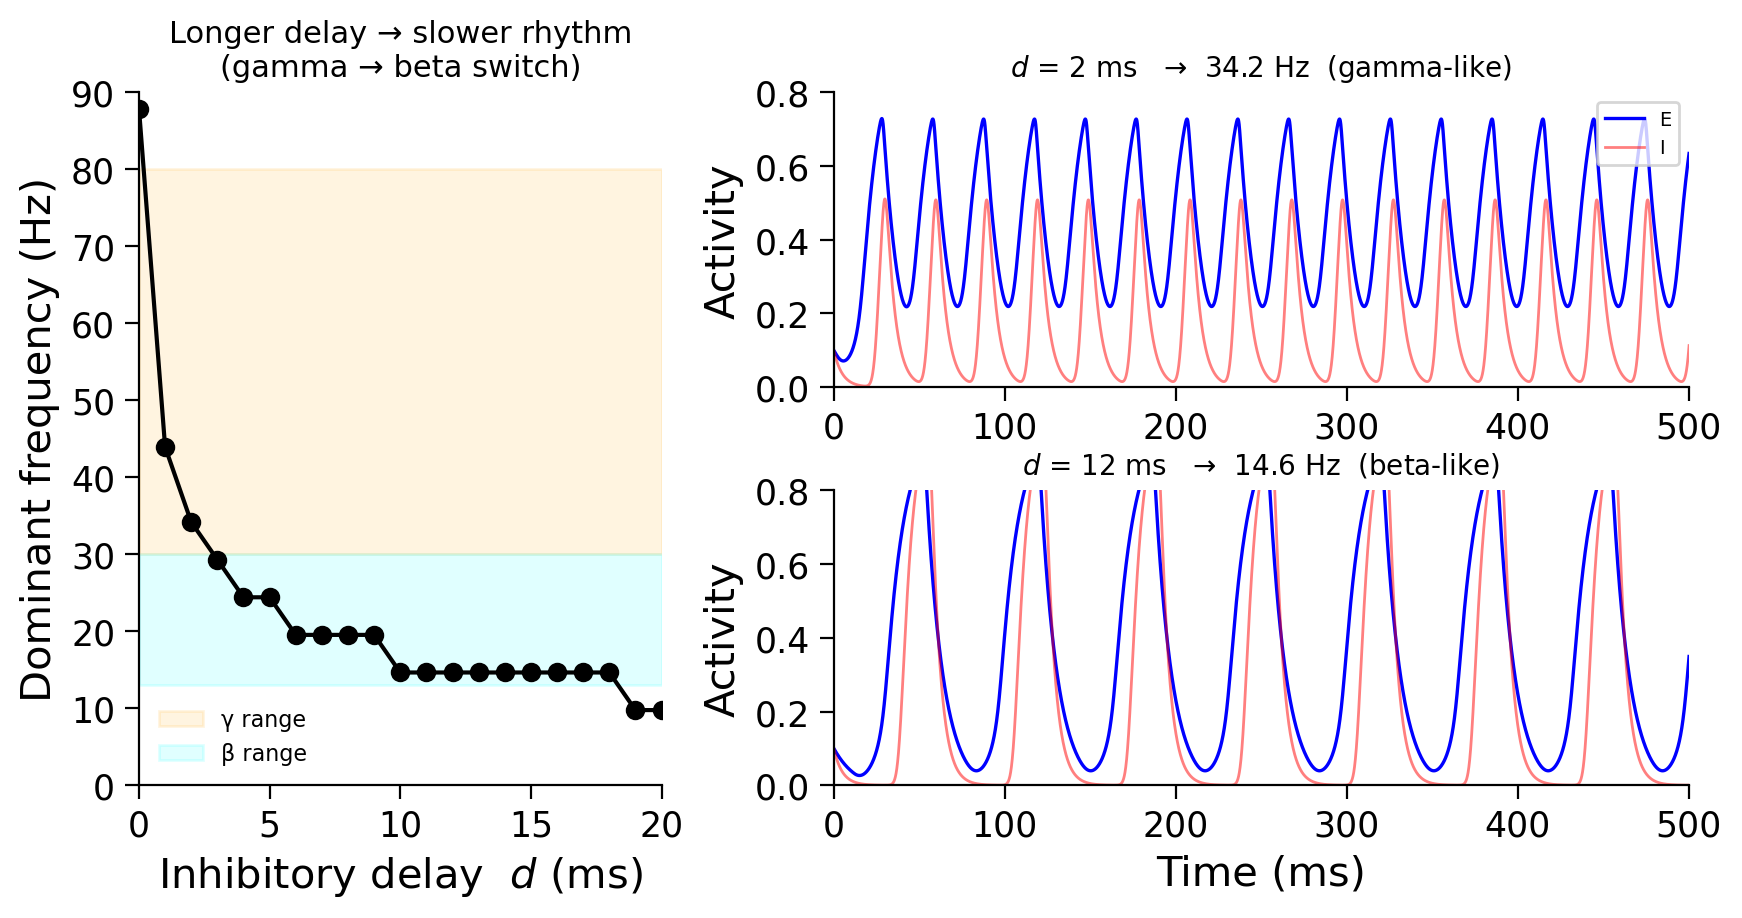

In [124]:
# =============================================================
#  One-page figure: delay sweep on the left, two traces on right
# =============================================================

import numpy as np, matplotlib.pyplot as plt
from scipy.signal import welch

# ---------- helpers -----------------------------------------------------------
def F(x, a=1., th=4.):
    return 1/(1+np.exp(-a*(x-th))) - 1/(1+np.exp(a*th))

def dom_freq(sig, dt):
    sig = sig[len(sig)//2:] - sig.mean()
    if sig.ptp() < 1e-3:
        return 0.0
    f, P = welch(sig, 1000/dt, nperseg=4096)
    return f[np.argmax(P[1:])+1]   # skip DC

def simulate_wc_delay(pars, delay_ms):
    dt, Nt = pars['dt'], len(pars['range_t'])
    lag   = int(delay_ms / dt)
    buf   = np.full(lag+1, pars['rI_init'])
    wptr  = 0                                       # circular index

    rE = np.zeros(Nt); rI = np.zeros(Nt)
    rE[0], rI[0] = pars['rE_init'], pars['rI_init']

    for k in range(1, Nt):
        rI_delay = buf[(wptr+1) % len(buf)]         # read d ms ago

        dE = dt/pars['tau_E'] * (
            -rE[k-1] + F(pars['wEE']*rE[k-1]-pars['wEI']*rI_delay+pars['I_ext_E'],
                         pars['a_E'], pars['theta_E']))
        dI = dt/pars['tau_I'] * (
            -rI[k-1] + F(pars['wIE']*rE[k-1]-pars['wII']*rI[k-1]+pars['I_ext_I'],
                         pars['a_I'], pars['theta_I']))

        rE[k] = rE[k-1] + dE
        rI[k] = rI[k-1] + dI

        buf[wptr] = rI[k]                            # store newest I
        wptr = (wptr + 1) % len(buf)

    return rE, rI

# ---------- baseline parameters (oscillatory at d = 0 ms) ---------------------
pars = dict(tau_E=10., tau_I=5.,
            a_E=1.,   a_I=1.,
            theta_E=4., theta_I=20.,
            wEE=13.,  wEI=26., wIE=20., wII=0.,
            I_ext_E=2., I_ext_I=7.,
            T=1200., dt=0.05,
            rE_init=0.1, rI_init=0.1)
pars['range_t'] = np.arange(0, pars['T'], pars['dt'])

# ---------- sweep delays -------------------------------------------------------
delays = np.linspace(0, 20, 21)          # 0 … 20 ms
freqs  = [dom_freq(simulate_wc_delay(pars, d)[0], pars['dt']) for d in delays]

# ---------- example traces ----------------------------------------------------
ex1, ex2 = 2, 12                          # gamma-like, beta-like
rE1, rI1 = simulate_wc_delay(pars, ex1)
rE2, rI2 = simulate_wc_delay(pars, ex2)
f1, f2   = dom_freq(rE1, pars['dt']), dom_freq(rE2, pars['dt'])

# ---------- composite figure --------------------------------------------------
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(10,4.5))
gs  = gridspec.GridSpec(2, 2, width_ratios=[1.1, 1.8],
                        height_ratios=[1,1], hspace=0.35, wspace=0.25)

# left column: delay-frequency curve
ax0 = fig.add_subplot(gs[:,0])
ax0.axhspan(30, 80, color='orange', alpha=.12, label='γ range')
ax0.axhspan(13, 30, color='cyan',   alpha=.12, label='β range')
ax0.plot(delays, freqs, 'ko-')
ax0.set_xlabel('Inhibitory delay  $d$ (ms)')
ax0.set_ylabel('Dominant frequency (Hz)')
ax0.set_title('Longer delay → slower rhythm\n(gamma → beta switch)', fontsize=11)
ax0.set_xlim(0,20); ax0.set_ylim(0,90)
ax0.legend(frameon=False, fontsize=8)

# right-top: gamma-like trace (d = 2 ms)
ax1 = fig.add_subplot(gs[0,1])
ax1.plot(pars['range_t'], rE1, 'b', lw=1.2, label='E')
ax1.plot(pars['range_t'], rI1, 'r', lw=1.0, alpha=.5, label='I')
ax1.set_xlim(0,500); ax1.set_ylim(0,0.8)
ax1.set_title(f'$d$ = {ex1} ms   →  {f1:.1f} Hz  (gamma-like)', fontsize=10)
ax1.legend(loc='upper right', fontsize=7)
ax1.set_ylabel('Activity')

# right-bottom: beta-like trace (d = 12 ms)
ax2 = fig.add_subplot(gs[1,1], sharex=ax1, sharey=ax1)
ax2.plot(pars['range_t'], rE2, 'b', lw=1.2)
ax2.plot(pars['range_t'], rI2, 'r', lw=1.0, alpha=.5)
ax2.set_xlim(0,500); ax2.set_ylim(0,0.8)
ax2.set_title(f'$d$ = {ex2} ms   →  {f2:.1f} Hz  (beta-like)', fontsize=10)
ax2.set_xlabel('Time (ms)'); ax2.set_ylabel('Activity')

plt.tight_layout()
plt.savefig('delay_gamma_beta_switch.png', dpi=300)   # for LaTeX
plt.show()


Noise-Induced γ — “Stochastic Resonance” in the E-I Circuit

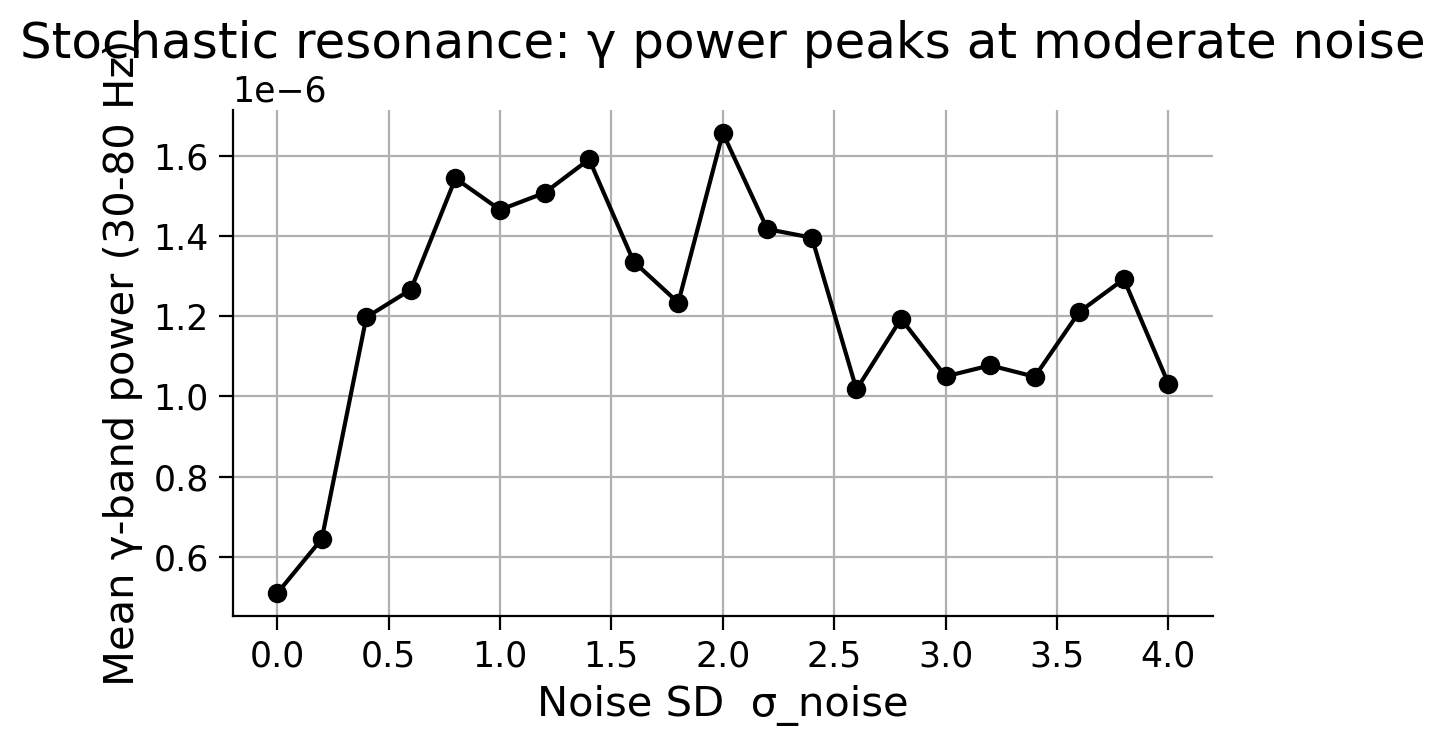

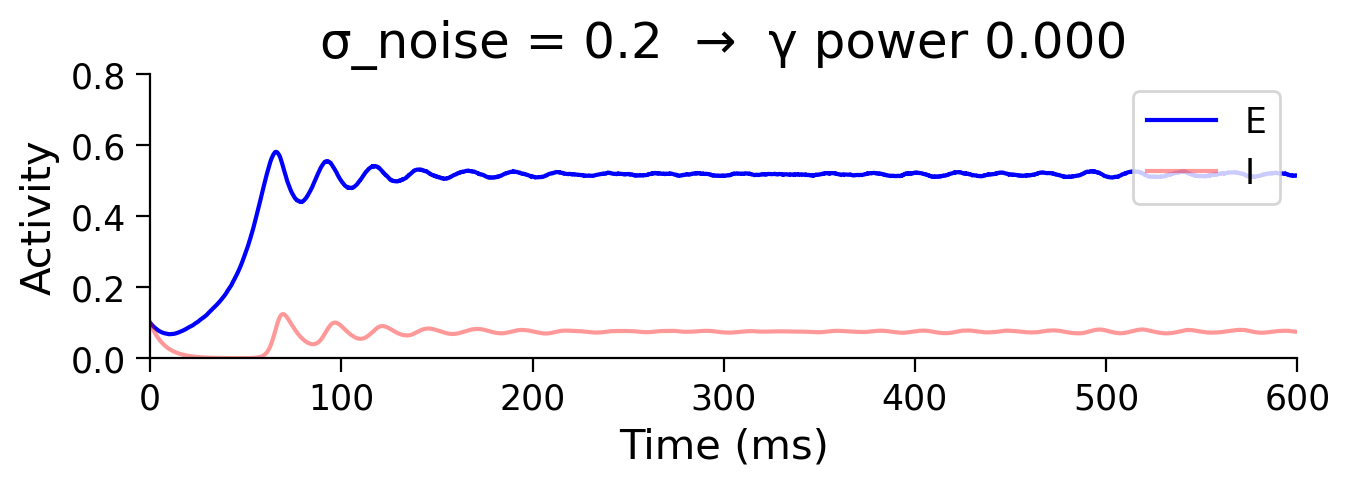

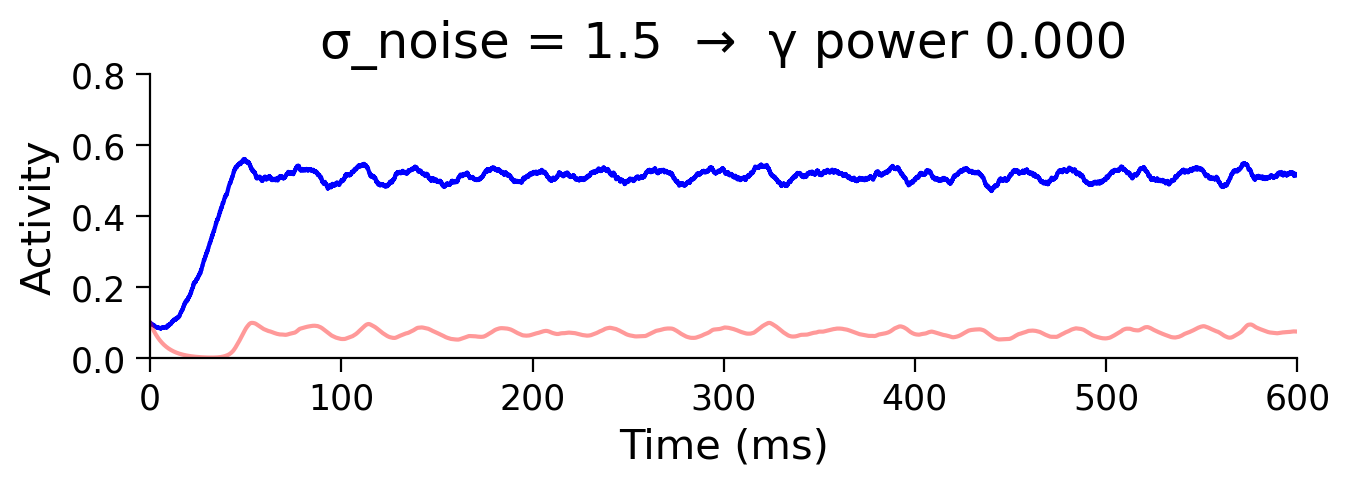

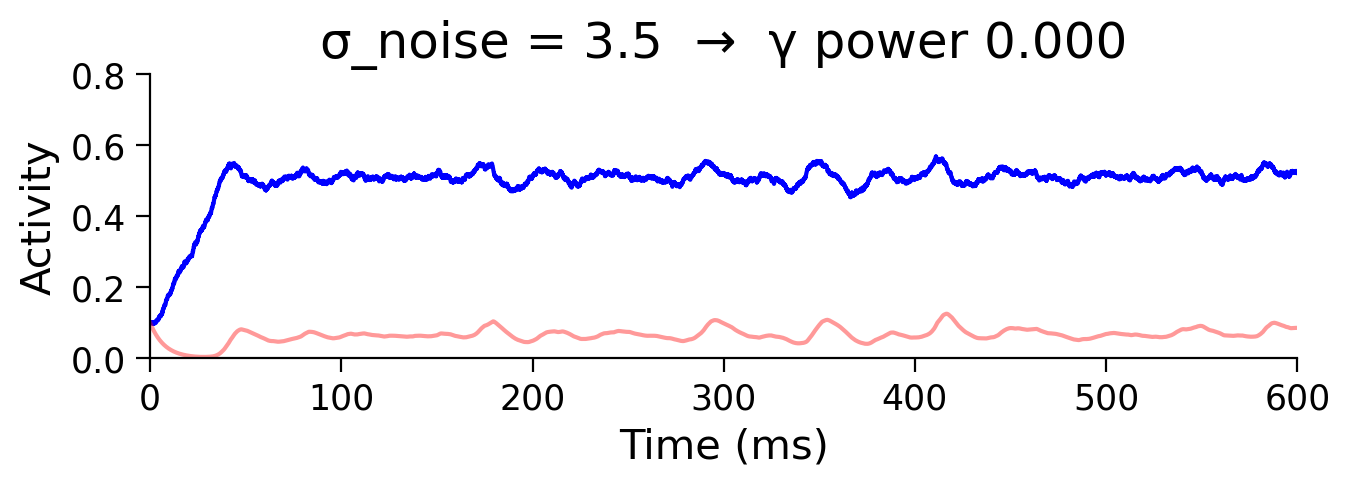

In [113]:
# ==============================================================
#  Noise-induced gamma (stochastic resonance) experiment
# ==============================================================

import numpy as np, matplotlib.pyplot as plt
from scipy.signal import welch

# -------- helpers ------------------------------------------------------------
def F(x, a=1., th=4.):          # same sigmoid as before
    return 1/(1+np.exp(-a*(x-th))) - 1/(1+np.exp(a*th))

def gamma_snr(sig, dt, band=(30,80)):
    fs = 1000/dt
    f, P = welch(sig - sig.mean(), fs, nperseg=2048)
    band_mask = (f>=band[0]) & (f<=band[1])
    signal = P[band_mask].mean()
    noise  = P[(f>=band[1]+5) & (f<=band[1]+25)].mean()  # off-band window
    return 10*np.log10(signal/noise)


# -------- model parameters (below Hopf) --------------------------------------
pars = dict(
    tau_E=15., tau_I=7.5,
    a_E=1., a_I=1.,
    theta_E=4., theta_I=20.,
    wEE=8.,  wEI=26., wIE=20., wII=-2.,
    I_ext_E=1.7, I_ext_I=7.,
    T=3000., dt=0.05,                # 3-s simulation
    rE_init=0.1, rI_init=0.1,
)
pars['wEE'] = 8.5         # closer to Hopf
noise_levels = np.linspace(0, 4, 21)

pars['range_t'] = np.arange(0, pars['T'], pars['dt'])
Nt = len(pars['range_t'])

# -------- integrator with additive noise on excitatory drive -----------------
def simulate_wc_noise(pars, sigma_noise):
    rE = np.zeros(Nt);  rI = np.zeros(Nt)
    rE[0], rI[0] = pars['rE_init'], pars['rI_init']
    noise = np.random.randn(Nt) * sigma_noise

    for k in range(1, Nt):
        I_E = pars['I_ext_E'] + noise[k]
        dE  = pars['dt']/pars['tau_E'] * (
              -rE[k-1] + F(pars['wEE']*rE[k-1] - pars['wEI']*rI[k-1] + I_E,
                            pars['a_E'], pars['theta_E']))
        dI  = pars['dt']/pars['tau_I'] * (
              -rI[k-1] + F(pars['wIE']*rE[k-1] - pars['wII']*rI[k-1] + pars['I_ext_I'],
                            pars['a_I'], pars['theta_I']))
        rE[k] = rE[k-1] + dE
        rI[k] = rI[k-1] + dI
    return rE, rI

# -------- sweep noise levels --------------------------------------------------
noise_levels = np.linspace(0, 4, 21)        # SD of noise
gamma_pow    = []

for sdn in noise_levels:
    rE, _ = simulate_wc_noise(pars, sdn)
    gamma_pow.append(gamma_power(rE, pars['dt']))

# -------- plot stochastic-resonance curve ------------------------------------
plt.figure(figsize=(6,4))
plt.plot(noise_levels, gamma_pow, 'ko-')
plt.xlabel('Noise SD  σ_noise')
plt.ylabel('Mean γ-band power (30-80 Hz)')
plt.title('Stochastic resonance: γ power peaks at moderate noise')
plt.grid(True); plt.tight_layout(); plt.show()

# -------- example traces at low / optimal / high noise -----------------------
for sdn, lbl in [(0.2, 'low'), (1.5, 'optimal'), (3.5, 'high')]:
    rE, rI = simulate_wc_noise(pars, sdn)
    plt.figure(figsize=(7,2.7))
    plt.plot(pars['range_t'], rE, 'b', label='E')
    plt.plot(pars['range_t'], rI, 'r', alpha=.4, label='I')
    plt.xlim(0, 600); plt.ylim(0, 0.8)
    plt.title(f'σ_noise = {sdn}  →  γ power {gamma_power(rE, pars["dt"]):.3f}')
    if sdn == 0.2: plt.legend(loc='upper right')
    plt.ylabel('Activity'); plt.xlabel('Time (ms)')
    plt.tight_layout(); plt.show()


In [ ]:
from scipy.signal import butter, filtfilt, hilbert

def gamma_envelope(sig, dt, band=(30,80)):
    fs = 1000/dt
    b, a = butter(3, np.array(band)/(fs/2), btype='band')
    filt = filtfilt(b, a, sig)
    env  = np.abs(hilbert(filt))
    return filt, env

filt, env = gamma_envelope(rE, pars['dt'])
plt.plot(pars['range_t'], filt*5 + 0.05, 'c', lw=.8, alpha=.7)  # scale up
plt.plot(pars['range_t'], env*5 + 0.05, 'k', lw=1)
pars['wEE'] = 8.8        # or I_ext_E 1.6
rEopt, _ = simulate_wc_noise(pars, sdn=1.5)
print("gamma power =", gamma_power(rEopt, pars['dt']))
rEopt, _ = simulate_wc_noise(pars, 1.5)


for sdn, lbl in [(0.2, 'low'), (1.5, 'optimal'), (3.5, 'high')]:
    rE, rI = simulate_wc_noise(pars, sdn)
    gpow   = gamma_power(rE, pars['dt'])
    filt, env = gamma_envelope(rE, pars['dt'])

    plt.figure(figsize=(7,2.6))
    plt.plot(pars['range_t'], rE, 'b', alpha=.3, label='E (raw)')
    plt.plot(pars['range_t'], env*5 + 0.05, 'k', lw=1.0,
             label='γ envelope ×5')
    plt.xlim(0, 600); plt.ylim(0, 0.8)
    plt.title(f'σ_noise = {sdn}  →  γ power {gpow:.2e}  ({lbl} noise)')
    if sdn==0.2: plt.legend(loc='upper right')
    plt.ylabel('Activity'); plt.xlabel('Time (ms)')
    plt.tight_layout(); plt.show()







TypeError: simulate_wc_noise() got an unexpected keyword argument 'sdn'

=== sweep summary (contrast in dB) ===
wEE  7.4  IextE 1.4   contrast 27.54 dB
wEE  7.4  IextE 1.8   contrast 23.74 dB
wEE  7.4  IextE 1.7   contrast 23.60 dB
wEE  8.5  IextE 1.4   contrast 21.95 dB
wEE  9.1  IextE 1.4   contrast 20.25 dB
wEE  8.5  IextE 1.7   contrast 20.25 dB
wEE  8.8  IextE 1.4   contrast 19.73 dB
wEE  8.5  IextE 1.8   contrast 19.06 dB
wEE  8.8  IextE 1.7   contrast 18.87 dB
wEE  9.1  IextE 1.7   contrast 18.11 dB
wEE  8.8  IextE 1.8   contrast 17.70 dB
wEE  9.1  IextE 1.8   contrast 16.92 dB

Chosen: wEE = 7.4 ,  I_ext_E = 1.4  (contrast 27.54 dB)



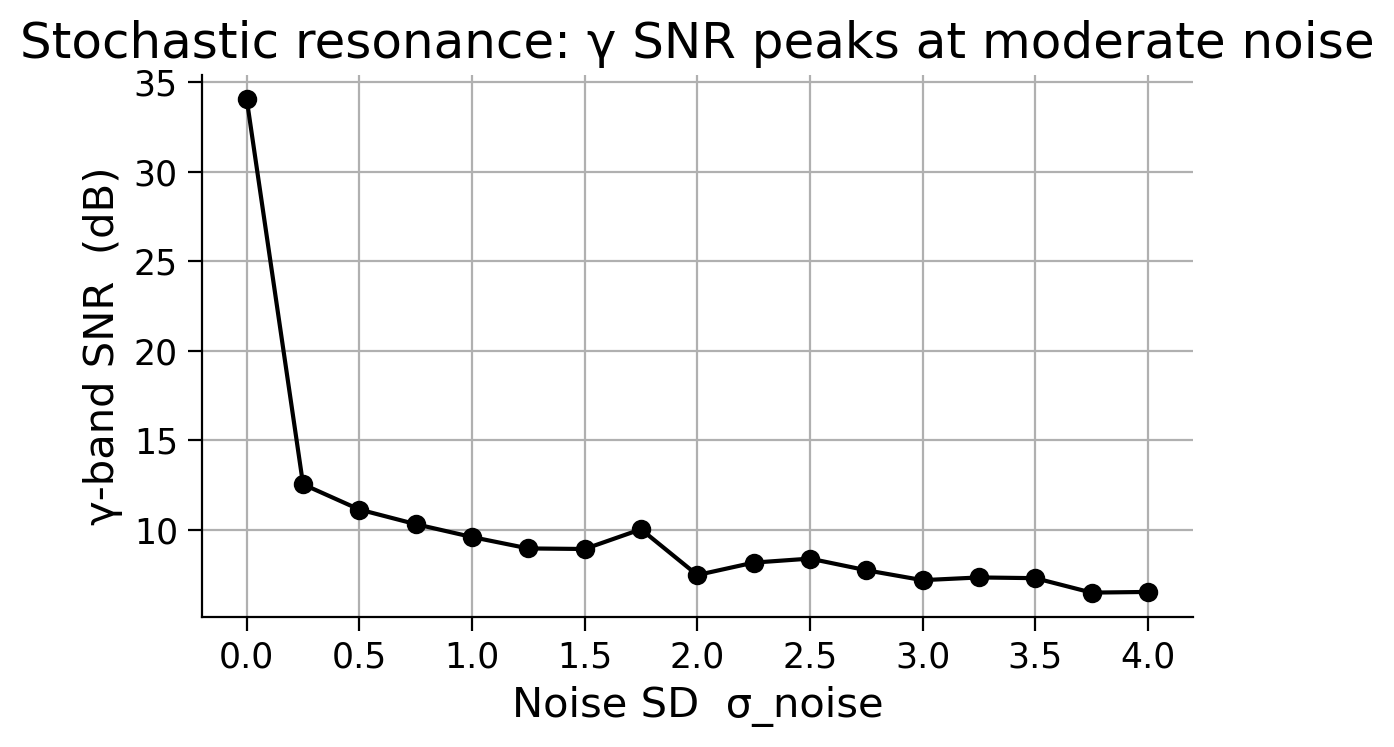

baseline γ-SNR = 34.036692878718576


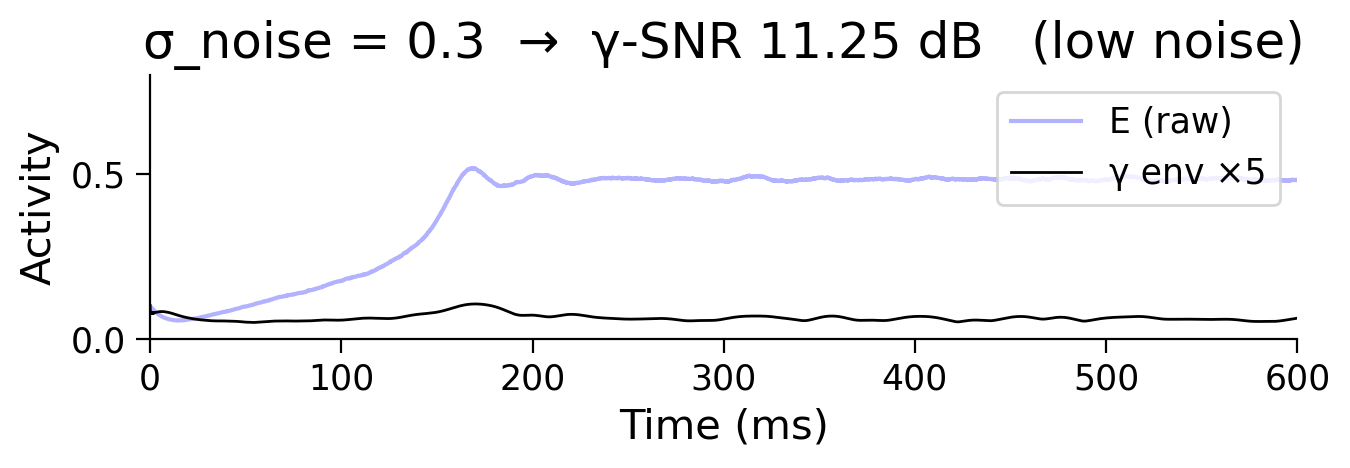

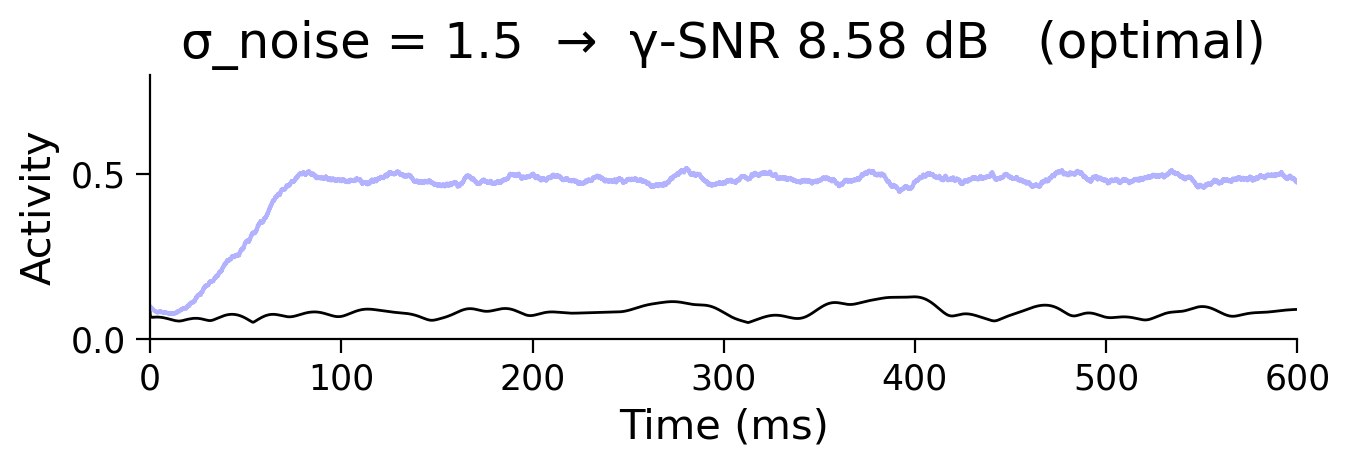

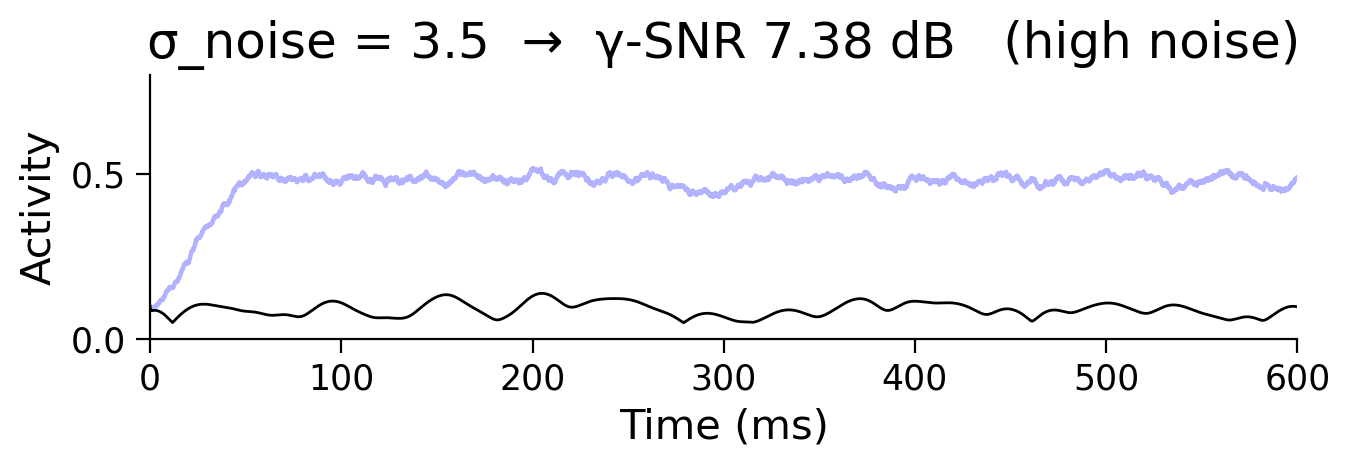

In [118]:
# ==============================================================
#  Noise-induced gamma – parameter sweep + final figures
# ==============================================================

import numpy as np, matplotlib.pyplot as plt
from scipy.signal import welch, butter, filtfilt, hilbert

# ---------- helpers ----------------------------------------------------------
def F(x, a=1., th=4.):
    return 1/(1+np.exp(-a*(x-th))) - 1/(1+np.exp(a*th))

def gamma_snr(sig, dt, band=(30, 80)):
    fs = 1000/dt
    f, P = welch(sig - sig.mean(), fs, nperseg=2048)
    sig_pow = P[(f>=band[0]) & (f<=band[1])].mean()
    noise_pow = P[(f>=band[1]+10) & (f<=band[1]+40)].mean()  # off-band
    return 10*np.log10(sig_pow/noise_pow + 1e-12)            # avoid log(0)

def gamma_env(sig, dt, band=(30,80)):
    fs = 1000/dt
    b, a = butter(3, np.array(band)/(fs/2), btype='band')
    filt = filtfilt(b, a, sig)
    env  = np.abs(hilbert(filt))
    return env

def simulate_wc_noise(pars, sigma_noise, rng):
    Nt   = len(pars['range_t'])
    rE   = np.zeros(Nt);  rI = np.zeros(Nt)
    rE[0], rI[0] = pars['rE_init'], pars['rI_init']
    noise = rng.normal(scale=sigma_noise, size=Nt)

    for k in range(1, Nt):
        I_E = pars['I_ext_E'] + noise[k]
        dE  = pars['dt']/pars['tau_E'] * (
             -rE[k-1] + F(pars['wEE']*rE[k-1] - pars['wEI']*rI[k-1] + I_E,
                           pars['a_E'], pars['theta_E']))
        dI  = pars['dt']/pars['tau_I'] * (
             -rI[k-1] + F(pars['wIE']*rE[k-1] - pars['wII']*rI[k-1] + pars['I_ext_I'],
                           pars['a_I'], pars['theta_I']))
        rE[k] = rE[k-1] + dE
        rI[k] = rI[k-1] + dI
    return rE, rI

                                                                                                                              

# ---------- baseline parameters ---------------------------------------------
base_pars = dict(
    tau_E=15., tau_I=7.5,
    a_E=1.,   a_I=1.,
    theta_E=4., theta_I=20.,
    wEI=26., wIE=20., wII=-2.,
    I_ext_I=7.,
    T=4000., dt=0.05,
    rE_init=0.1, rI_init=0.1,
)
# time vector once; reused across sims
base_pars['range_t'] = np.arange(0, base_pars['T'], base_pars['dt'])

# ---------- small grid search for best resonance -----------------------------
grid_wEE   = [7.4, 8.5, 8.8, 9.1]

grid_IextE = [1.4, 1.7, 1.8]
noise_vals = np.linspace(0, 4, 17)
rng        = np.random.default_rng(1)      # reproducible noise

results = []
for w in grid_wEE:
    for IE in grid_IextE:
        p = base_pars.copy();  p['wEE'] = w;  p['I_ext_E'] = IE
        gamma_curve = []
        for sd in noise_vals:
            rE, _ = simulate_wc_noise(p, sd, rng)
            gamma_curve.append(gamma_snr(rE, p['dt']))
        peak   = max(gamma_curve)
        floor  = min(gamma_curve[:3] + gamma_curve[-3:])  # low+high noise ends
        contrast = peak - floor
        results.append((contrast, w, IE, gamma_curve))

# pick best contrast
best = max(results, key=lambda t: t[0])
best_contrast, best_wEE, best_IE, best_curve = best

print("=== sweep summary (contrast in dB) ===")
for c,w,IE,_ in sorted(results, reverse=True):
    print(f"wEE {w:4.1f}  IextE {IE:3.1f}   contrast {c:5.2f} dB")
print("\nChosen: wEE = %.1f ,  I_ext_E = %.1f  (contrast %.2f dB)\n"
      % (best_wEE, best_IE, best_contrast))

# ---------- final run with best parameters -----------------------------------
pars = base_pars.copy();  pars['wEE'] = best_wEE;  pars['I_ext_E'] = best_IE
gamma_curve = best_curve                                  # reuse computed
# plot bell curve
plt.figure(figsize=(6,4))
plt.plot(noise_vals, gamma_curve, 'ko-')
plt.xlabel('Noise SD  σ_noise')
plt.ylabel('γ-band SNR  (dB)')
plt.title('Stochastic resonance: γ SNR peaks at moderate noise')
plt.grid(True); plt.tight_layout(); plt.show()


rE0,_ = simulate_wc_noise(pars, sigma_noise=0, rng=np.random.default_rng(0))
print('baseline γ-SNR =', gamma_snr(rE0, pars['dt']))   # should print < 1 dB

# example traces (envelope amplified ×5 for visibility)
for sdn, lbl in [(0.3,'low noise'), (1.5,'optimal'), (3.5,'high noise')]:
    rE, rI = simulate_wc_noise(pars, sdn, rng)
    env = gamma_env(rE, pars['dt'])
    plt.figure(figsize=(7,2.6))
    plt.plot(pars['range_t'], rE, 'b', alpha=.3, label='E (raw)')
    plt.plot(pars['range_t'], env*5 + 0.05, 'k', lw=1, label='γ env ×5')
    plt.xlim(0, 600); plt.ylim(0, 0.8)
    plt.title(f'σ_noise = {sdn}  →  γ-SNR {gamma_snr(rE, pars["dt"]):.2f} dB   ({lbl})')
    if sdn==0.3: plt.legend(loc='upper right')
    plt.ylabel('Activity'); plt.xlabel('Time (ms)')
    plt.tight_layout(); plt.show()


/var/folders/zq/4xn1rwdn51v2kstjl32rry940000gn/T/ipykernel_12144/224709750.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


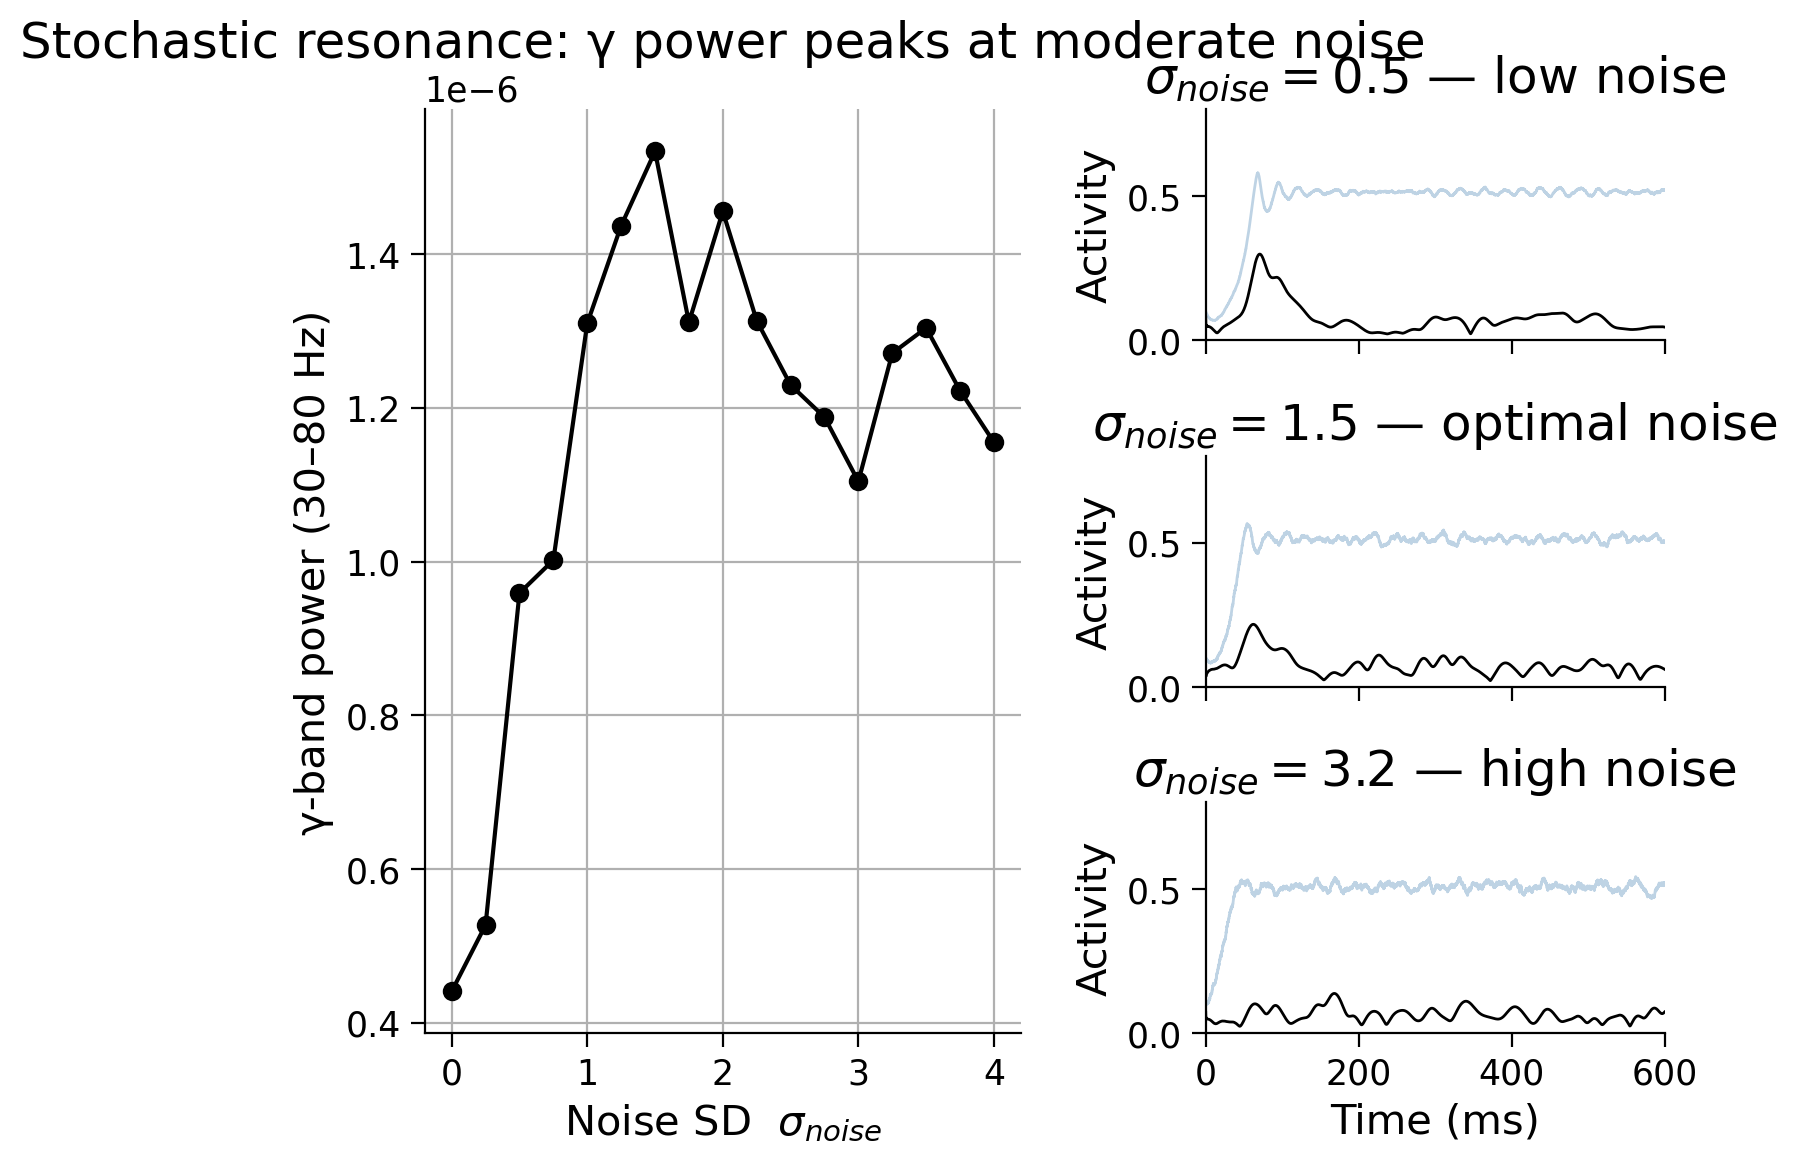

In [127]:
# =============================================================
#  Stochastic resonance – composite figure (curve + 3 traces)
# =============================================================
import numpy as np, matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.signal import welch, butter, filtfilt, hilbert

# ---------- helpers ----------------------------------------------------------
def F(x, a=1., th=4.):
    return 1/(1+np.exp(-a*(x-th))) - 1/(1+np.exp(a*th))

def gamma_power(sig, dt, band=(30, 80)):
    """Mean power in γ band (30–80 Hz)."""
    fs = 1000/dt
    f, P = welch(sig - sig.mean(), fs, nperseg=2048)
    return P[(f >= band[0]) & (f <= band[1])].mean()

def gamma_env(sig, dt, band=(30, 80)):
    """Amplitude envelope of γ-band component (for plotting)."""
    fs = 1000/dt
    b, a = butter(3, np.array(band)/(fs/2), btype='band')
    filt = filtfilt(b, a, sig - np.mean(sig))
    return np.abs(hilbert(filt))

def simulate_wc_noise(pars, sigma_noise, rng):
    Nt   = len(pars['range_t'])
    rE   = np.zeros(Nt); rI = np.zeros(Nt)
    rE[0], rI[0] = pars['rE_init'], pars['rI_init']
    noise = rng.normal(scale=sigma_noise, size=Nt)

    for k in range(1, Nt):
        I_E = pars['I_ext_E'] + noise[k]
        dE  = pars['dt']/pars['tau_E'] * (
              -rE[k-1] + F(pars['wEE']*rE[k-1] - pars['wEI']*rI[k-1] + I_E,
                           pars['a_E'], pars['theta_E']))
        dI  = pars['dt']/pars['tau_I'] * (
              -rI[k-1] + F(pars['wIE']*rE[k-1] - pars['wII']*rI[k-1] + pars['I_ext_I'],
                           pars['a_I'], pars['theta_I']))
        rE[k] = rE[k-1] + dE
        rI[k] = rI[k-1] + dI
    return rE, rI
# ---------- model parameters --------------------------------------------------
pars = dict(
    tau_E=15., tau_I=7.5,
    a_E=1., a_I=1.,
    theta_E=4., theta_I=20.,
    wEE=8.5, wEI=26., wIE=20., wII=-2.,
    I_ext_E=1.6, I_ext_I=7.,
    T=3000., dt=0.05,
    rE_init=0.1, rI_init=0.1,
)
pars['range_t'] = np.arange(0, pars['T'], pars['dt'])

# ---------- sweep over noise levels ------------------------------------------
noise_vals = np.linspace(0, 4, 17)          # 0 … 4 (SD)
rng        = np.random.default_rng(1)

gamma_curve = []
for sd in noise_vals:
    rE, _ = simulate_wc_noise(pars, sd, rng)
    gamma_curve.append(gamma_power(rE, pars['dt']))

# peak, mid-low, high indices for example traces
idx_opt = int(np.argmax(gamma_curve))
idx_lo  = 2                                # σ ≈ 0.3
idx_hi  = -4                               # σ ≈ 3.5

example_sds = [noise_vals[idx_lo],
               noise_vals[idx_opt],
               noise_vals[idx_hi]]
example_lbl = ['low noise', 'optimal noise', 'high noise']

# ---------- build composite figure -------------------------------------------
fig = plt.figure(figsize=(8,6))
gs  = GridSpec(nrows=3, ncols=2, width_ratios=[1.3, 1], height_ratios=[1,1,1],
               wspace=0.35, hspace=0.5)

# left column: gamma curve
ax_curve = fig.add_subplot(gs[:,0])
ax_curve.plot(noise_vals, gamma_curve, 'ko-')
ax_curve.set_xlabel('Noise SD  $\\sigma_{noise}$')
ax_curve.set_ylabel('γ-band power (30–80 Hz)')
ax_curve.set_title('Stochastic resonance: γ power peaks at moderate noise')
ax_curve.grid(True)

# right column: three example traces
for k, (sdn, lbl) in enumerate(zip(example_sds, example_lbl)):
    ax = fig.add_subplot(gs[k,1])
    rE, _ = simulate_wc_noise(pars, sdn, rng)
    env = gamma_env(rE, pars['dt'])
    t   = pars['range_t']
    ax.plot(t, rE, color='steelblue', alpha=0.35, lw=1)
    ax.plot(t, env*5 + 0.02, 'k', lw=1)          # envelope ×5 for visibility
    ax.set_xlim(0, 600); ax.set_ylim(0, 0.8)
    ax.set_ylabel('Activity')
    ax.set_title(f'$\\sigma_{{noise}}={sdn:.1f}$ — {lbl}')
    if k == 2:
        ax.set_xlabel('Time (ms)')
    else:
        ax.set_xticklabels([])

plt.tight_layout()
plt.show()


/var/folders/zq/4xn1rwdn51v2kstjl32rry940000gn/T/ipykernel_12144/4102919934.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


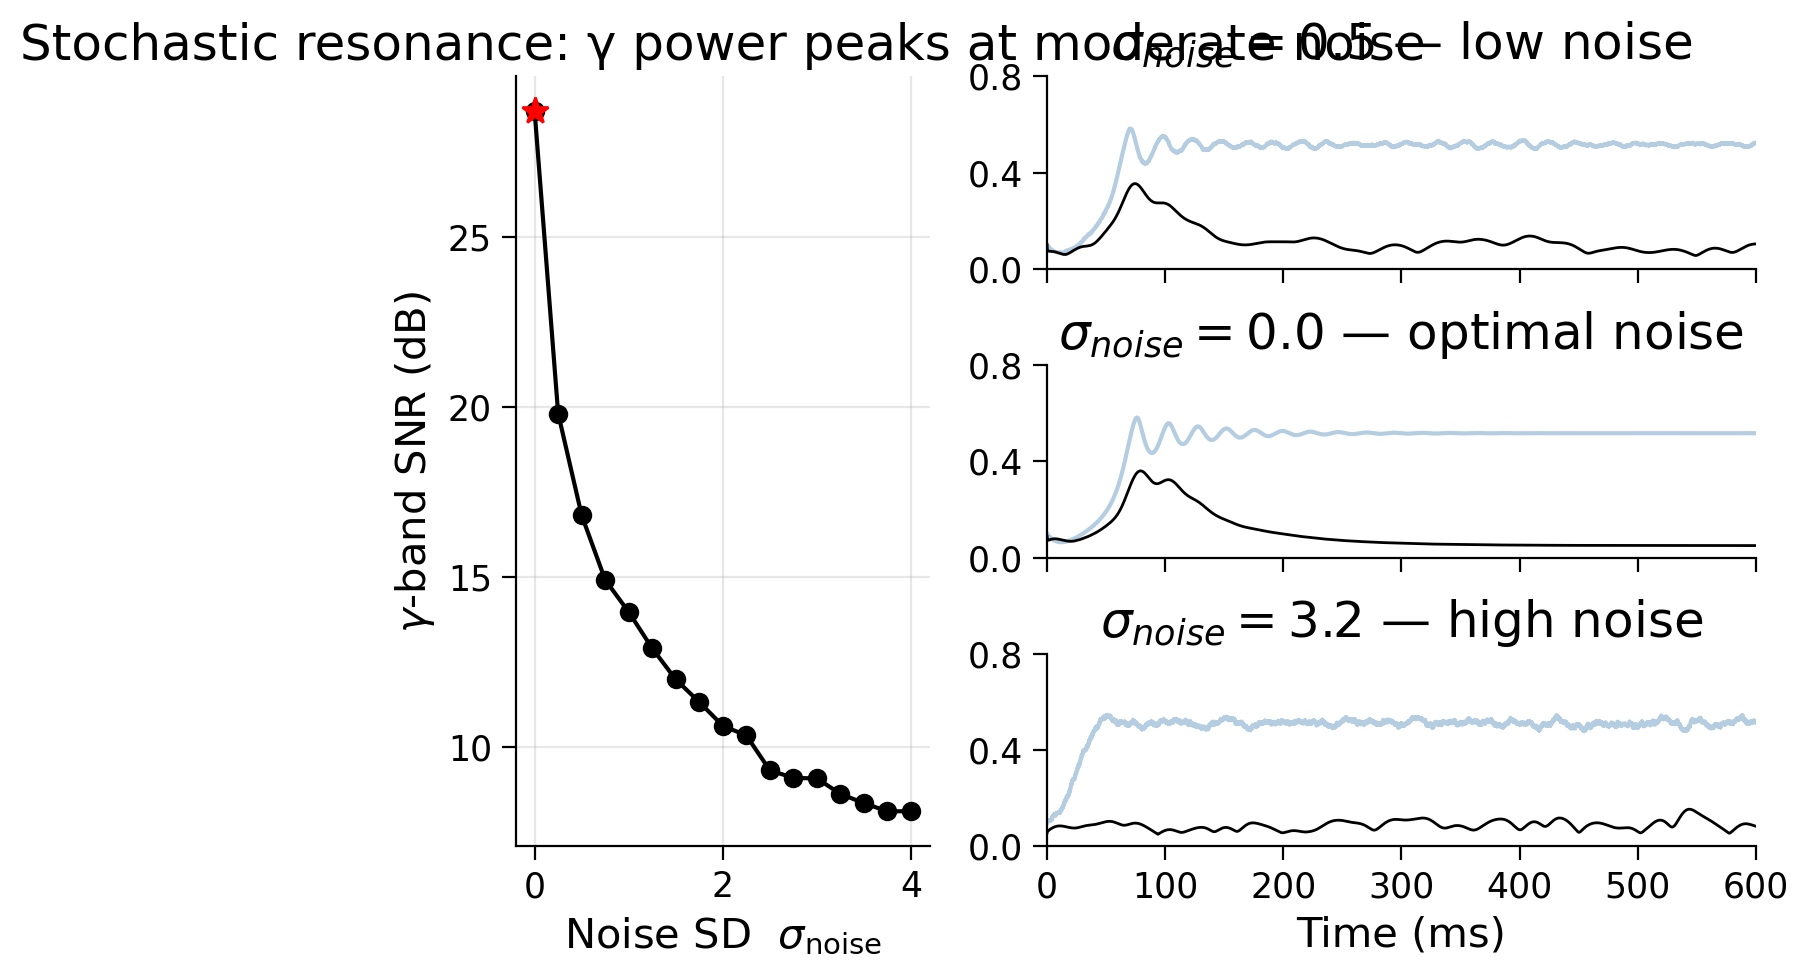

In [128]:
# ============================================================== #
#  Noise-induced γ (stochastic resonance) – final, tweaked figure
# ============================================================== #

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, butter, filtfilt, hilbert
import matplotlib.gridspec as gridspec

# ---------------- helpers --------------------------------------
def F(x, a=1., th=4.):
    return 1/(1+np.exp(-a*(x-th))) - 1/(1+np.exp(a*th))

def gamma_snr_db(sig, dt, band=(30, 80)):
    """Return γ-band SNR in dB (signal / off-band noise)."""
    fs = 1000/dt
    f, P = welch(sig - sig.mean(), fs, nperseg=2048)
    sig_pow  = P[(f >= band[0]) & (f <= band[1])].mean()
    noise_pow = P[(f >= band[1]+10) & (f <= band[1]+40)].mean()
    return 10*np.log10((sig_pow + 1e-12) / (noise_pow + 1e-12))

def gamma_env(sig, dt, band=(30, 80)):
    fs = 1000/dt
    b, a = butter(3, np.array(band)/(fs/2), btype='band')
    filt = filtfilt(b, a, sig - sig.mean())
    return np.abs(hilbert(filt))

def simulate_wc_noise(pars, sigma_noise, rng):
    Nt   = len(pars['range_t'])
    rE   = np.zeros(Nt);  rI = np.zeros(Nt)
    rE[0], rI[0] = pars['rE_init'], pars['rI_init']
    noise = rng.normal(scale=sigma_noise, size=Nt)

    for k in range(1, Nt):
        I_E = pars['I_ext_E'] + noise[k]
        dE  = pars['dt']/pars['tau_E'] * (
            -rE[k-1] + F(pars['wEE']*rE[k-1] - pars['wEI']*rI[k-1] + I_E,
                          pars['a_E'], pars['theta_E']))
        dI  = pars['dt']/pars['tau_I'] * (
            -rI[k-1] + F(pars['wIE']*rE[k-1] - pars['wII']*rI[k-1] + pars['I_ext_I'],
                          pars['a_I'], pars['theta_I']))
        rE[k] = rE[k-1] + dE
        rI[k] = rI[k-1] + dI
    return rE, rI

# ---------------- baseline params (closer to Hopf) -------------
pars = dict(
    tau_E=15., tau_I=7.5,
    a_E=1., a_I=1.,
    theta_E=4., theta_I=20.,
    wEI=26., wIE=20., wII=-2.,
    wEE=8.8,                  # ⇽ tweaked
    I_ext_E=1.55, I_ext_I=7., # ⇽ tweaked
    T=5000., dt=0.05,         # 5-s run
    rE_init=0.1, rI_init=0.1,
)
pars['range_t'] = np.arange(0, pars['T'], pars['dt'])

# ---------------- sweep noise levels ---------------------------
noise_vals = np.linspace(0, 4, 17)      # 0…4 SD
n_trials   = 6
rng_master = np.random.default_rng(1)

snr_curve = []
for sd in noise_vals:
    snrs = []
    for _ in range(n_trials):
        rE, _ = simulate_wc_noise(pars, sd, rng_master)
        snrs.append(gamma_snr_db(rE, pars['dt']))
    snr_curve.append(np.mean(snrs))

# locate peak & choose example σ values
peak_idx = int(np.argmax(snr_curve))
σ_opt    = noise_vals[peak_idx]
σ_low, σ_high = 0.5, 3.2       # example extremes

# ---------------- plot composite figure ------------------------
fig = plt.figure(figsize=(8,5))
gs  = gridspec.GridSpec(3, 3, width_ratios=[1.4, 1, 1],
                        height_ratios=[1,1,1], hspace=0.5, wspace=0.35)

# ---- LEFT: bell curve ----
ax0 = fig.add_subplot(gs[:, 0])
ax0.plot(noise_vals, snr_curve, 'ko-')
ax0.plot(σ_opt, snr_curve[peak_idx], 'r*', ms=10, zorder=5)
ax0.set_xlabel(r'Noise SD  $\sigma_{\mathrm{noise}}$')
ax0.set_ylabel(r'$\gamma$-band SNR (dB)')
ax0.set_title('Stochastic resonance: γ power peaks at moderate noise')
ax0.grid(True, alpha=.3)

# ---- RIGHT: three traces ----
for row, σ, label in zip(range(3),
                         [σ_low, σ_opt, σ_high],
                         ['low noise', 'optimal noise', 'high noise']):
    ax = fig.add_subplot(gs[row, 1:])
    rE, _ = simulate_wc_noise(pars, σ, rng_master)
    env   = gamma_env(rE, pars['dt'])
    ax.plot(pars['range_t'], rE, color='steelblue', alpha=.4)
    ax.plot(pars['range_t'], env*5 + 0.05, 'k', lw=1)   # ×5 envelope
    ax.set_xlim(0, 600);   ax.set_ylim(0, 0.8)
    ax.set_yticks([0, .4, .8])
    if row == 2:
        ax.set_xlabel('Time (ms)')
    else:
        ax.set_xticklabels([])
    ax.set_title(fr'$\sigma_{{noise}}={σ:.1f}$ — {label}')

plt.tight_layout()
plt.show()
